- Raghavi Rajumohan <br/>

In [1]:
# Import all the neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wooldridge as woo
import math
import seaborn as sns
import scipy.stats as stats
from fitter import Fitter
from sklearn.datasets import load_diabetes
from scipy import stats
from boruta import BorutaPy
from BorutaShap import BorutaShap
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from RegscorePy import *
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from simple_colors import *
from scipy import misc
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="whitegrid")
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm
import statsmodels.api as sm
import statsmodels.graphics as smg
import statsmodels.stats.api as sms
import statsmodels.stats.outliers_influence as smo
import patsy as pt
import statsmodels.stats.outliers_influence as oi
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Import Data

### Identifying a dataset of my choosing. Making sure it has at least 15-20 predictor variables, and that it includes quantitative and factor variables 

In [2]:
# Importing Data Set 
house = pd.read_csv('ParisHousing.csv')

house

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


## Y Variable
- Price

## Quantitative Varables (8)
- squareMeters
- numberOfRooms
- numPrevOwners
- basement
- attic
- garage
- hasGuestRoom
- price

## Factor Variables (8)
- hasYard
- hasPools
- floors
- made
- isNewBuilt (~newly renovated)
- hasStormPredictor
- hasStorageRoom
- cityPartRange

There's a total of 16 predictor variables in our data set

The objective of this econometrics project is to develop a predictive model for housing prices using a dataset comprising various features related to properties. The primary goal is to determine the factors that significantly influence housing prices and create a robust regression model to predict prices accurately.

**Motivation and Problem Statement**

The motivation behind this analysis stems from the need to understand the dynamics of housing prices and the factors affecting them. By identifying crucial predictors, we aim to provide insights into the housing market, understanding price determinants that aid stakeholders in making informed decisions.

**Data Description and Sources**

The dataset used for this analysis contains information on housing properties, including quantitative features like square footage, number of rooms, and binary factors such as the presence of a yard, pool, or garage. The data were obtained from Kaggle and consist of 1000 entries with 17 columns.



# Check Data

In [4]:
house.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,49870.13,28774.38,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,50.36,28.82,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,0.51,0.50,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,0.50,0.50,0.0,0.00,0.0,1.00,1.0
floors,10000.0,50.28,28.89,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,50225.49,29006.68,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.51,2.87,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.52,2.86,1.0,3.00,5.0,8.00,10.0
made,10000.0,2005.49,9.31,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,0.50,0.50,0.0,0.00,0.0,1.00,1.0


## Check for Null Values

In [5]:
house.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

# Cleaning Up Data Set

1. "cityCode" variable
    - We drop cityCode because it doesn't provide us with signficant information for finding price
2.  "made" variable
    - We create a new categorical variable to measure the year when the place was built
    - Increments of 5 years
3.  "price" variable
    - Due to the high magnitude of price, we apply a square-root transformation
4.  Filtering the data
    - Due to the dataset being very large, we filter our data to only show data where floors are less than 5


In [5]:
# 1. Remove city code
del house["cityCode"]

In [6]:
# 2. 'Made' variable
##Creating new catgeorical variable to measure age, which represents increments of 5 years 
house['made_time'] = 0

conditions = [
    (house['made'] >= 1990) & (house['made'] <= 1994),
    (house['made'] >= 1995) & (house['made'] <= 1999),
    (house['made'] >= 2000) & (house['made'] <= 2004),
    (house['made'] >= 2005) & (house['made'] <= 2009),
    (house['made'] >= 2010) & (house['made'] <= 2014),
    (house['made'] > 2015)
]

house['made_time'] = np.select(conditions, [1, 2, 3, 4, 5, 6], default=0)

In [7]:
# 3. Transforming 'price' 
house.price = np.sqrt(house.price)

In [8]:
# 4. Filtering Data 
## drop floors > 5
drop = house.floors > 5
house = house[~(drop)]

house = house.reset_index(drop=True)

In [9]:
house

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,made_time
0,19127,31,1,0,5,2,9,2008,0,0,5387,4430,374,0,4,1383.722805,4
1,95121,46,0,1,3,7,9,1994,0,0,615,1221,328,0,10,3084.710748,1
2,48062,22,0,1,4,1,10,2008,1,0,7908,552,817,1,1,2193.169806,4
3,1450,59,0,0,1,10,9,2018,1,1,1285,8119,869,1,10,382.337286,6
4,65151,81,1,1,3,7,9,1991,0,0,3218,9119,849,0,4,2553.973590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1565,100,0,1,1,6,4,2005,1,0,2062,8379,946,1,0,400.753665,4
501,95549,30,1,1,3,10,1,2000,1,1,9714,4500,987,1,10,3092.084734,3
502,4221,60,0,0,4,7,1,2019,1,1,261,9825,909,0,6,650.611943,6
503,74701,98,0,1,3,10,3,2001,1,0,3086,4928,839,0,4,2734.042264,3


# 1. Variable Selection:

### 1a) Using the Boruta Algorithm identify the top ∼5-10 quantitative predictors (could be fewer 5 depending on your finding)

In [11]:
#Creating a Data set with all Quantitative variables 
data = house[['price', 'squareMeters', 'numberOfRooms', 'numPrevOwners', 'basement',
             'attic', 'garage', 'hasGuestRoom']].copy()
data

,price,squareMeters,numberOfRooms,numPrevOwners,basement,attic,garage,hasGuestRoom
0,1383.722805,19127,31,9,5387,4430,374,4
1,3084.710748,95121,46,9,615,1221,328,10
2,2193.169806,48062,22,10,7908,552,817,1
3,382.337286,1450,59,9,1285,8119,869,10
4,2553.973590,65151,81,9,3218,9119,849,4
...,...,...,...,...,...,...,...,...
500,400.753665,1565,100,4,2062,8379,946,0
501,3092.084734,95549,30,1,9714,4500,987,10
502,650.611943,4221,60,1,261,9825,909,6
503,2734.042264,74701,98,3,3086,4928,839,4


In [12]:
x = data.iloc[:, 1:]
# sqrt on price because of magnitude, done before
y = data['price']

xCols = x.columns.tolist()


currentTrainX = x.to_numpy()
currentTrainY = y.to_numpy().ravel()

In [14]:
forest = RandomForestRegressor(n_jobs=-1, max_depth = 5)
forest.fit(currentTrainX, currentTrainY)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [15]:
np.int = int
np.float = float
np.bool = bool
boruta = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)
boruta.fit(currentTrainX, currentTrainY)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	4
Iteration: 	17 / 

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=40,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x1334F7A40),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x1334F7A40,
         verbose=2)

In [16]:
featureSupport = list((zip(xCols, boruta.support_)))
featureSupport

[('squareMeters', True),
 ('numberOfRooms', False),
 ('numPrevOwners', False),
 ('basement', False),
 ('attic', False),
 ('garage', False),
 ('hasGuestRoom', False)]

In [17]:
featureRanks = list(zip(xCols, boruta.ranking_))
sorted(featureRanks, key=lambda x: x[1])

[('squareMeters', 1),
 ('garage', 2),
 ('basement', 3),
 ('hasGuestRoom', 4),
 ('numPrevOwners', 5),
 ('numberOfRooms', 6),
 ('attic', 6)]

  0%|          | 0/50 [00:00<?, ?it/s]

1 attributes confirmed important: ['squareMeters']
6 attributes confirmed unimportant: ['attic', 'garage', 'hasGuestRoom', 'basement', 'numPrevOwners', 'numberOfRooms']
0 tentative attributes remains: []


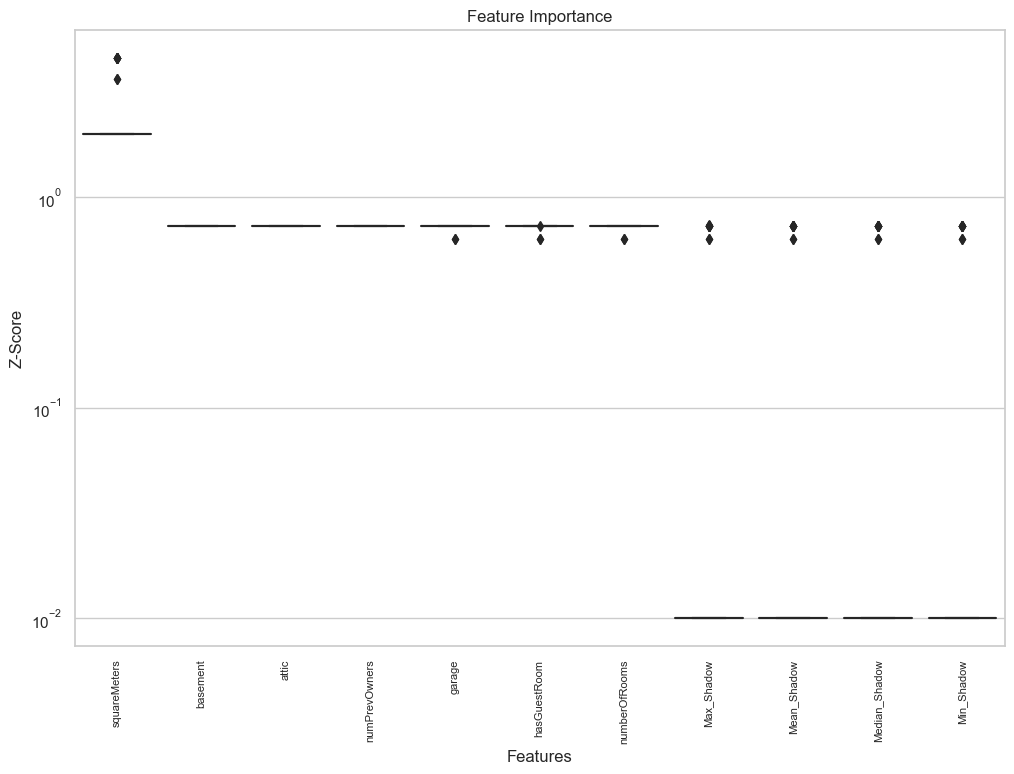

In [18]:
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')


The Boruta Algorithm recognises ‘squareMeters’ as the most important variable, followed by 'garage', 'basement', 'hasGuestRoom','numPrevOwners','numberOfRooms', and 'attic'.

We have used the feature ranking provided by Boruta as our deciding factor for choosing quantitative variables.

Our top predictive quant variables are:
- squareMeters
- garage
- basement
- hasGuestRoom
- numPrevOwners

The feature rankings based on Borutashap values offer insightful perspectives into the factors significantly influencing housing prices. 

At the forefront is the square footage of the property, highlighting the fundamental importance of size in determining value. This aligns with common expectations, as larger properties often command higher prices. 

The presence of a basement and garage follows closely, emphasizing the practical aspects of additional storage and parking spaces. 

The inclusion of features such as a guest room and attic in the top rankings suggests that considerations beyond sheer size, like functionality and versatility, contribute meaningfully to housing prices. 

Overall, these rankings provide nuanced insights, guiding real estate professionals to consider a holistic set of features when evaluating and pricing properties. This understanding enhances the predictive modeling process, fostering a more comprehensive approach to property valuation and aiding stakeholders in making informed decisions within the dynamic real estate market.


## Top Predictive Quant Variables:
1. squareMeters
2. garage
3. basement
4. hasGuestRoom
5. numPrevOwners

### 1b) Using standard techniques, identify at least 2-3 factor variables to include as predictors.

In [23]:
factor_var = ["price", "floors", "hasYard", "hasPool", "cityPartRange", "isNewBuilt", "hasStormProtector", "hasStorageRoom", "made_time"]

df = house[factor_var].copy()

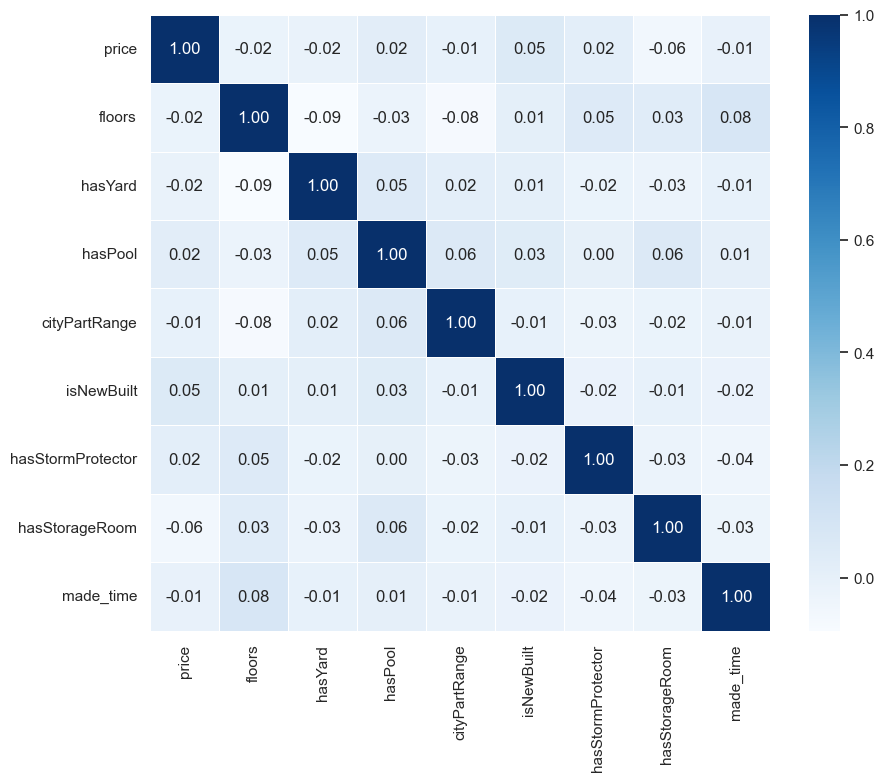

In [24]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [25]:
anova_results = []

# Performing ANOVA for each factor variable
for factor in factor_var[1:]:
    model = smf.ols(f'price ~ C({factor})', data=house).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results.append((factor, anova_table['F'][0], anova_table['PR(>F)'][0]))

# Sort ANOVA results by p-value
anova_results.sort(key=lambda x: x[2])

# Display top 3 factor variables based on lowest p-value
top_factors = anova_results[:3]
print(blue("Factors with lowest p-value: ",['bold']))
for factor, F_statistic, p_value in top_factors:
    print(f"Factor: {factor}, F-statistic: {F_statistic}, p-value: {p_value}")

Factors with lowest p-value: 
Factor: cityPartRange, F-statistic: 1.4715526771190492, p-value: 0.15541461507802717
Factor: hasStorageRoom, F-statistic: 1.6359711837479356, p-value: 0.20146888092694795
Factor: isNewBuilt, F-statistic: 1.454600049716789, p-value: 0.22835825019417152


## Top Factor Variables:
1. hasStorageRoom
2. isNewBuilt
3. cityPartRange

**Factor Variables:**
In the exploratory data analysis, two key analyses were conducted to understand the factors influencing housing prices in the dataset. 

- The first analysis focused on examining the correlation between various factors and the target variable 'price.' The results revealed that 'isNewBuilt' and 'hasStorageRoom'  exhibited the strongest correlations with 'price.' While 'isNewBuilt' had a modest positive correlation (0.05) and 'hasStorageRoom' a correlation of 0.6, 'cityPartRange' showed weaker positive correlation (0.01) . However, it's important to note that all these correlations were relatively low, suggesting that linear relationships with the target variable might not be strong.

- To further investigate the impact of categorical variables on housing prices, an analysis of variance (ANOVA) was performed. The top three factors based on F-statistics and p-values were identified as 'hasStorageRoom,' 'isNewBuilt,' and 'cityPartRange.' Despite these variables having the highest statistical significance among the factors, the p-values were still relatively high, indicating a lack of strong evidence to reject the null hypothesis. This suggests that these factors may not significantly influence mean housing prices.


## 2. Descriptive Analysis

### (a) Begin by providing a descriptive analysis of your variables. This should include things like histograms, quantile plots, correlation plots, etc.

### - Histogram

In [13]:
data = house[['price', 'squareMeters', 'basement', 'garage', 'hasGuestRoom', 'numPrevOwners', 'hasStorageRoom', 'isNewBuilt', 'cityPartRange']].copy()

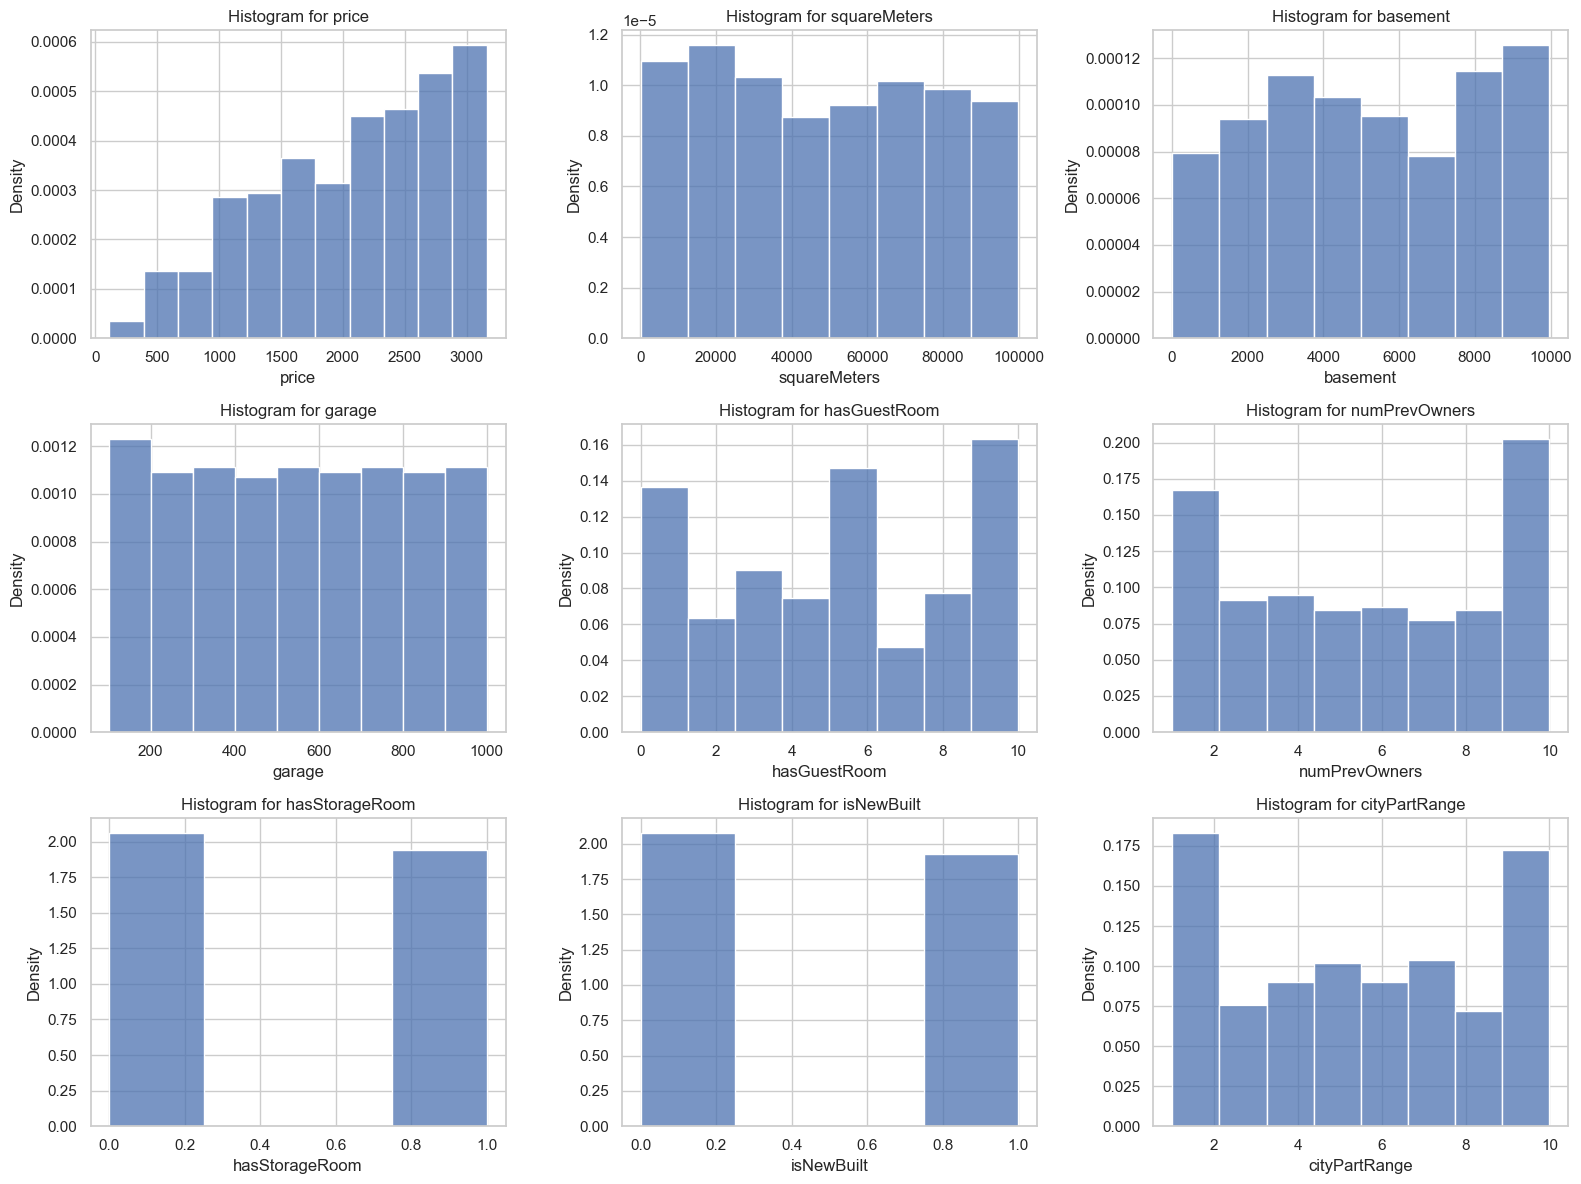

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))


axes = axes.flatten()


for i, col in enumerate(data.columns):
    sns.histplot(data[col], stat="density", bins='fd', ax=axes[i])
    axes[i].set_title("Histogram for " + col)
    axes[i].set_xlabel(col)


plt.tight_layout()


plt.show()



Investigating the histograms for each variable in our dataset offers a more thorough understanding of their respective distributions. Notably, the ‘price’ variable exhibits a negative skewness, with a longer tail to the left of the distribution. These distributions indicate the existence of data points with values notably lower than the majority of data, leading to a scenario where the mean is less than the median.

On the other hand, ‘squareMeters’, ‘basement’, and ‘garage’ present a multi-modal distribution. The histograms of ‘hasGuestRoom’ and ‘numPrevOwners' display skewness with two distinct peaks at either end, indicating the presence of different groups or patterns within the data.

Finally, ‘cityPartRange’, ‘hasStorageRoom’, and ‘isNewBuilt’ are categorical variables. ‘hasStorageRoom’, and ‘isNewBuilt’ are binary predictors based off the histograms, and 'cityPartRange' has 8 levels to it. 

### 2. Q-Q Plots

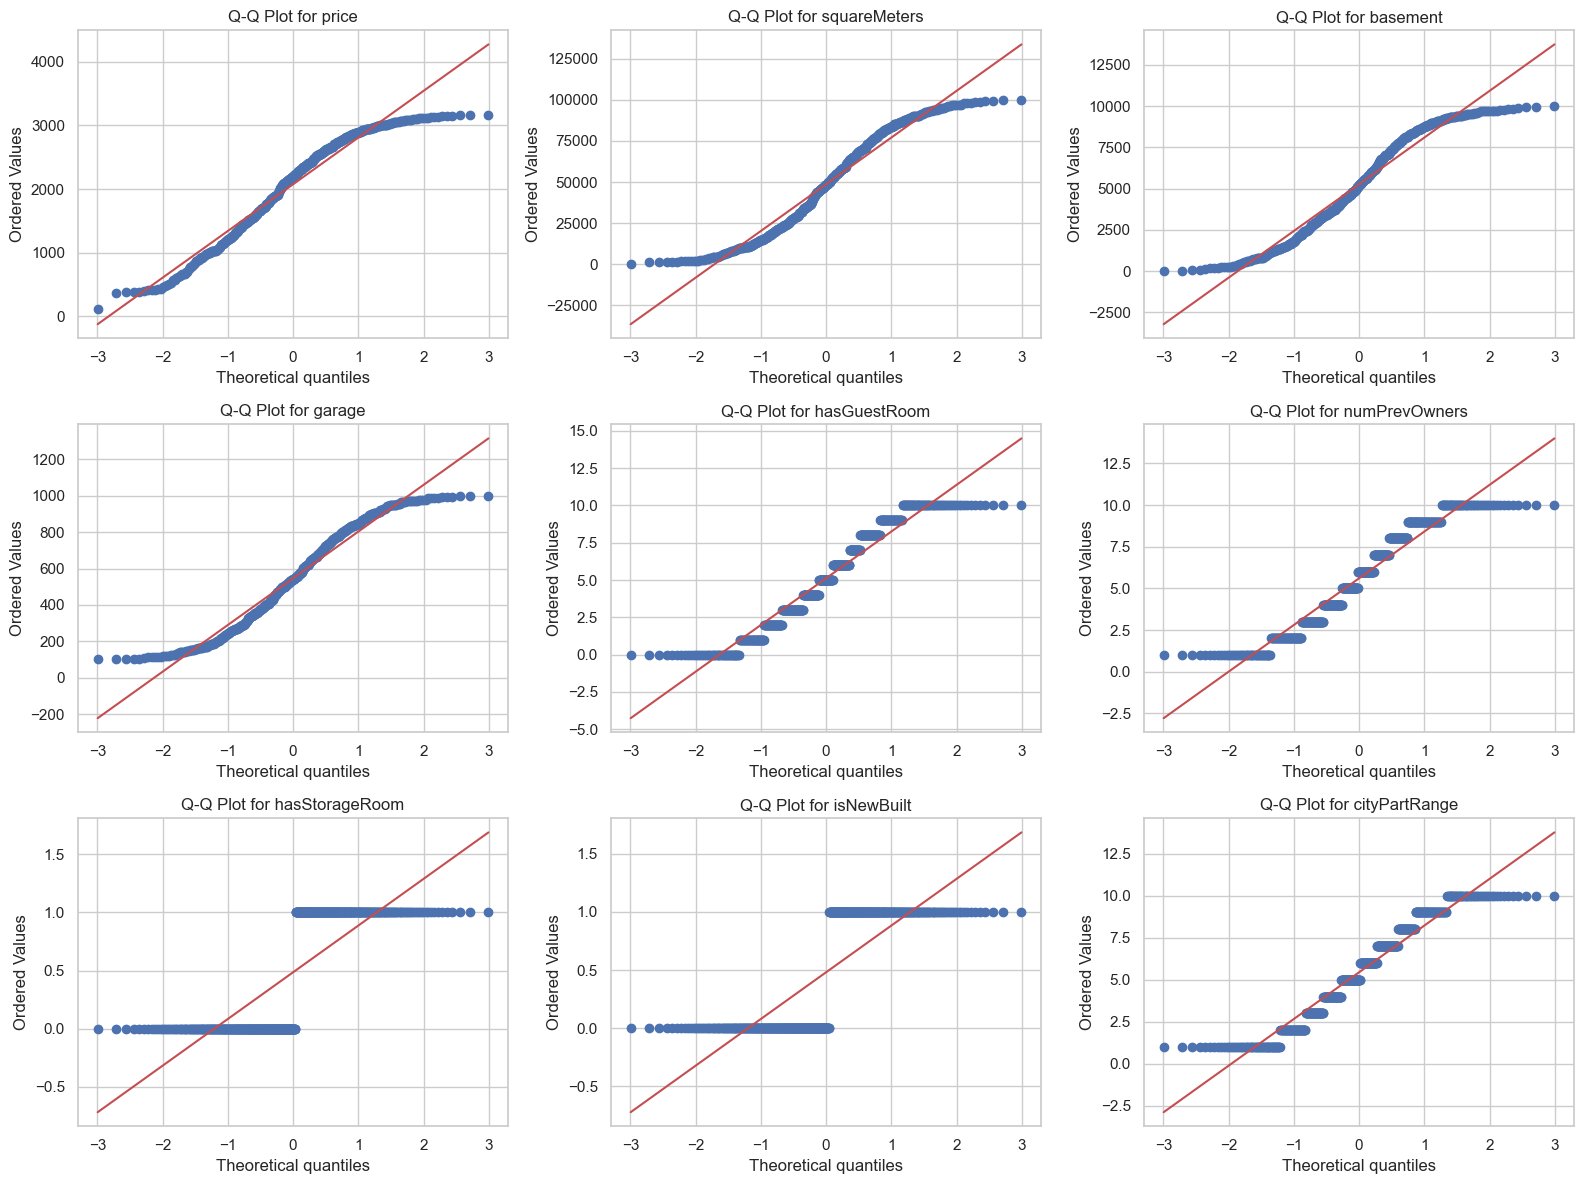

In [28]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))


axes = axes.flatten()


for i, col in enumerate(data.columns):
    stats.probplot(data[col], dist="norm", plot=axes[i])
    axes[i].set_title("Q-Q Plot for " + col)


plt.tight_layout()


plt.show()



In our examination of Q-Q plots, most variables do not align perfectly with the standard normal distribution. Notably, ‘hasStorageRoom’ and ‘isNewBuilt’ are categorical variables, and represent two distinct lines within the Q-Q plot. Similarly, ‘hasGuestRoom’, ‘numPrevOwners, and ‘cityPartRange’ have ranges within the data which are clearly visible from the graphs.

Finally, the Q-Q plots for ‘price’, ‘squareMeters’, ‘basement’, and ‘garage’ deviate from normality, especially in its tails. Points above the reference line suggest heavier tails, indicating the presence of extreme values. Conversely, points below the line in the range from 0 to 1 on the X-axis imply lighter tails.


### 3. Correlation plots

<Axes: >

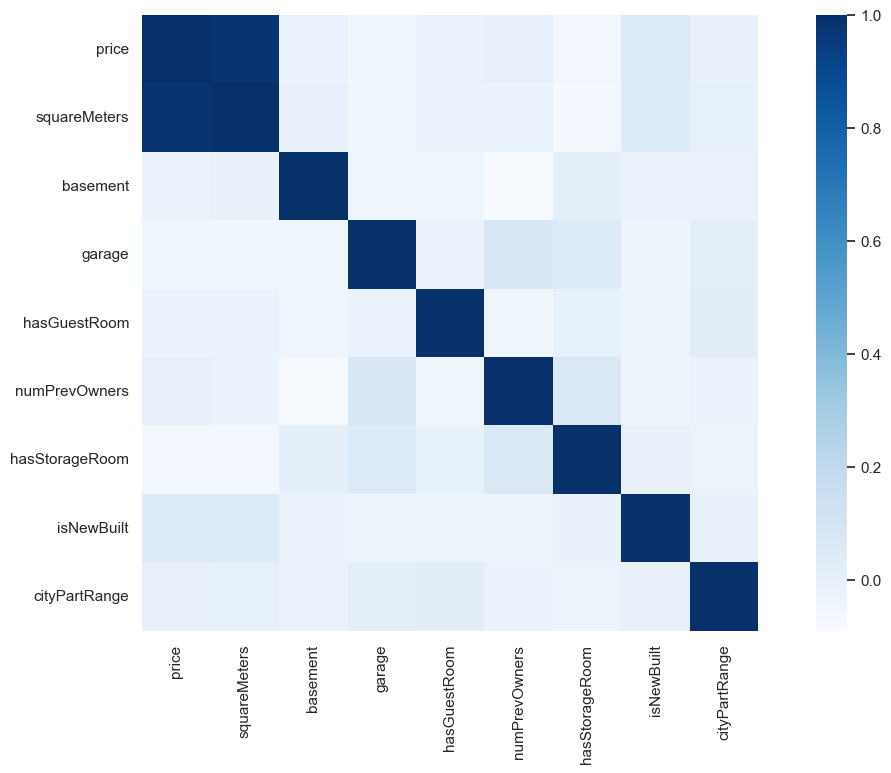

In [29]:
plt.figure(figsize=(15,8))
data.corr()
c= data.corr()
sns.heatmap(c,cmap="Blues",square = True, annot = False)

As can be seen from the correlation matrix, most variables within the dataset are very minimally correlated to each other, with the exception of ‘squareMeters’ and ‘price’ which have a high degree of correlation.

### 4. Boxplot

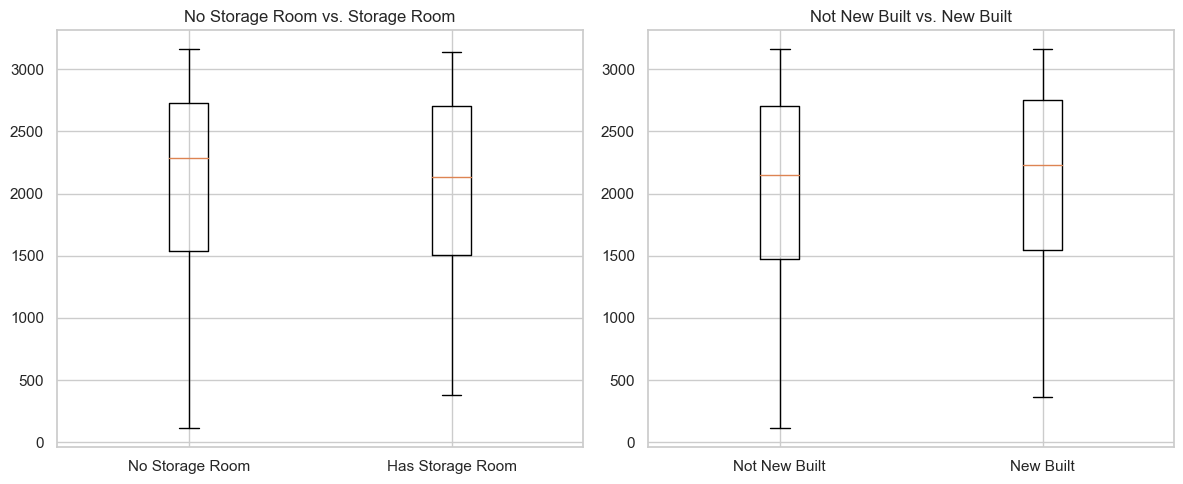

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


data_set = [data[data.hasStorageRoom == 0].price, data[data.hasStorageRoom != 0].price]
axs[0].boxplot(data_set)
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(["No Storage Room", "Has Storage Room"])
axs[0].set_title("No Storage Room vs. Storage Room")


data_set = [data[data.isNewBuilt == 0].price, data[data.isNewBuilt != 0].price]
axs[1].boxplot(data_set)
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(["Not New Built", "New Built"])
axs[1].set_title("Not New Built vs. New Built")


plt.tight_layout()


plt.show()



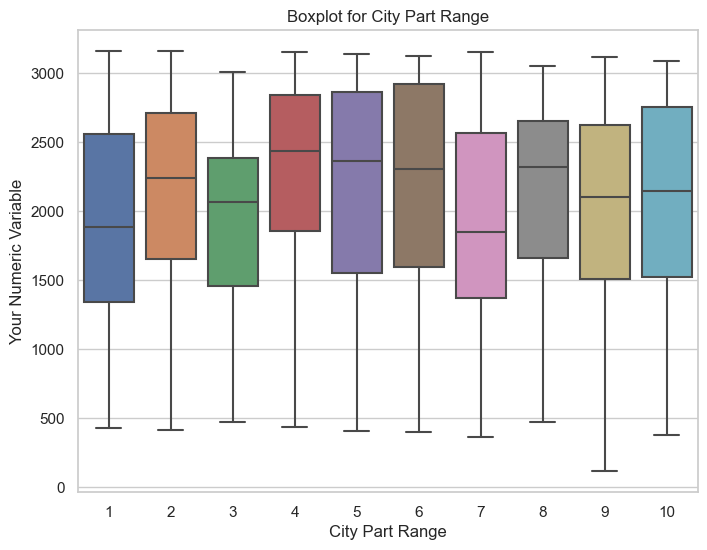

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='cityPartRange', y='price', data=data)
plt.title('Boxplot for City Part Range')
plt.xlabel('City Part Range')
plt.ylabel('Your Numeric Variable')

plt.show()


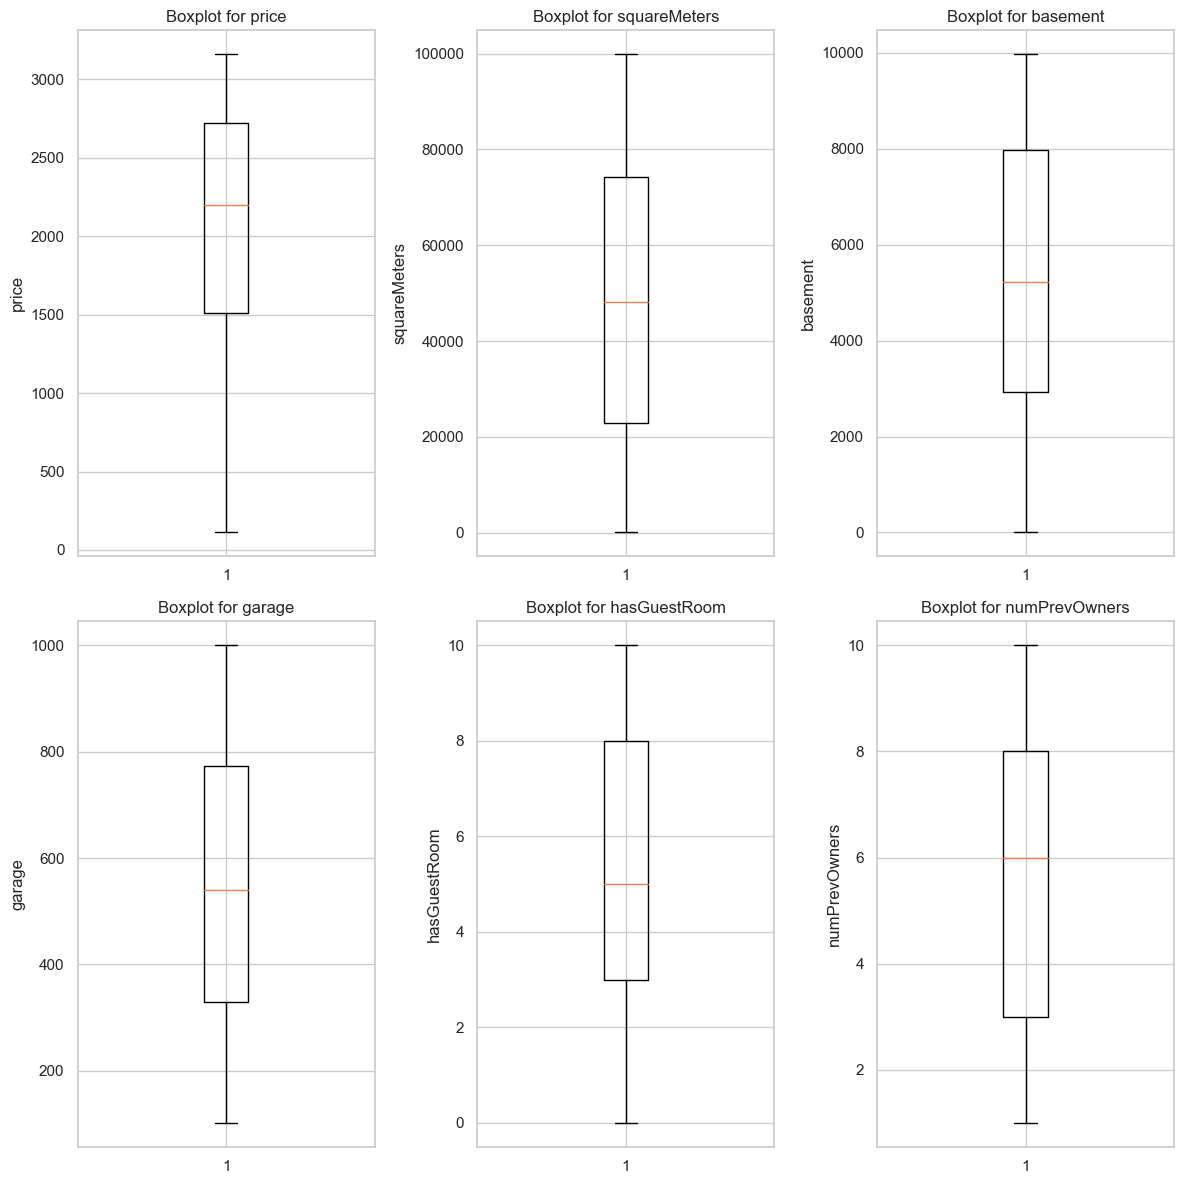

In [32]:
num_rows, num_cols = 2, 3
num_plots = min(len(data.columns), num_rows * num_cols)

columns_to_exclude = ['hasStorageRoom', 'isNewBuilt', 'cityPartRange']
columns_to_include = [col for col in data.columns if col not in columns_to_exclude]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i, column in enumerate(columns_to_include[:num_plots]):
    row, col = i // num_cols, i % num_cols
    ax = axes[row, col]
    ax.boxplot(data[column])
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel(column)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



Based on the boxplots of each variable, we can make several observations about the distribution and presence of potential outliers in the dataset.

The boxplots offer information about the existence of outliers in multiple variables within the dataset. Given that outliers can influence the outcomes and assumptions of statistical analyses, it is crucial to acknowledge their presence and contemplate potential measures, such as data transformation or outlier management techniques, during the analysis. Based off our boxplots, we don't see any outliers in any of our variables.

### (b) Estimate density plots for all your variables, and show the respective fitted distributions.

### 1. Cullen-Frey

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED ksone distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED loglaplace distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED mielke distribution (taking more than 30 seconds)
SKIPPED nakagami distribution (taking more than 30 seconds)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED norminvgauss distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (taking more th

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gibrat,6.101586e-08,3706.896626,3719.740193,inf,0.426398,0.000000e+00
halfgennorm,7.248806e-08,3858.720994,3877.986343,inf,0.455623,0.000000e+00
gengamma,1.050961e-07,3268.301779,3293.988911,inf,0.460920,0.000000e+00
exponweib,1.423053e-07,3055.016706,3080.703838,inf,0.410256,0.000000e+00
beta,1.845715e-07,4841.969808,4867.656940,inf,0.243470,1.107200e-237


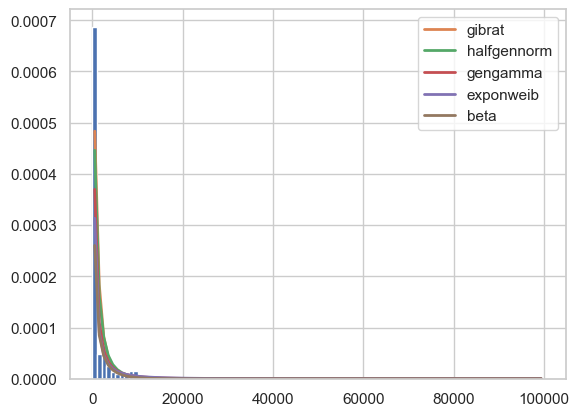

In [48]:
f = Fitter(data)
f.fit()

f.summary()


The analysis aimed to fit various probability distributions to the dataset to identify the best-fitting models for the observed data. The summary of the fitting results for selected distributions—gibrat, halfgennorm, gengamma, exponweib, and beta—is presented below:

1. **Goodness of Fit:**
   - All fitted distributions exhibit significant goodness-of-fit, as indicated by the KS statistic and associated p-values. The p-values are close to zero, suggesting a high likelihood that these distributions accurately represent the observed data. 

2. **Model Evaluation:**
   -  Among the fitted distributions, the exponweib distribution exhibits the lowest AIC and BIC values, followed closely by gengamma, indicating that these distributions might provide better explanatory power for the data compared to other models.

3. **Divergence Measures:**
   -  The KL divergence, although reported as "inf" for all distributions, implies an infinite divergence between the fitted and empirical distributions. This suggests that while the distributions fit the data well, there might be certain areas where the fitted distributions diverge significantly from the empirical data.



- The fitting process demonstrates the suitability of multiple distributions in representing the observed data adequately.
- While the KS test indicates good fits, the infinite KL divergence implies potential limitations in completely capturing the dataset's characteristics.
- The AIC and BIC metrics suggest that the exponweib and gengamma distributions might be preferred models due to their lower information criteria values.

### 2. Density Plots

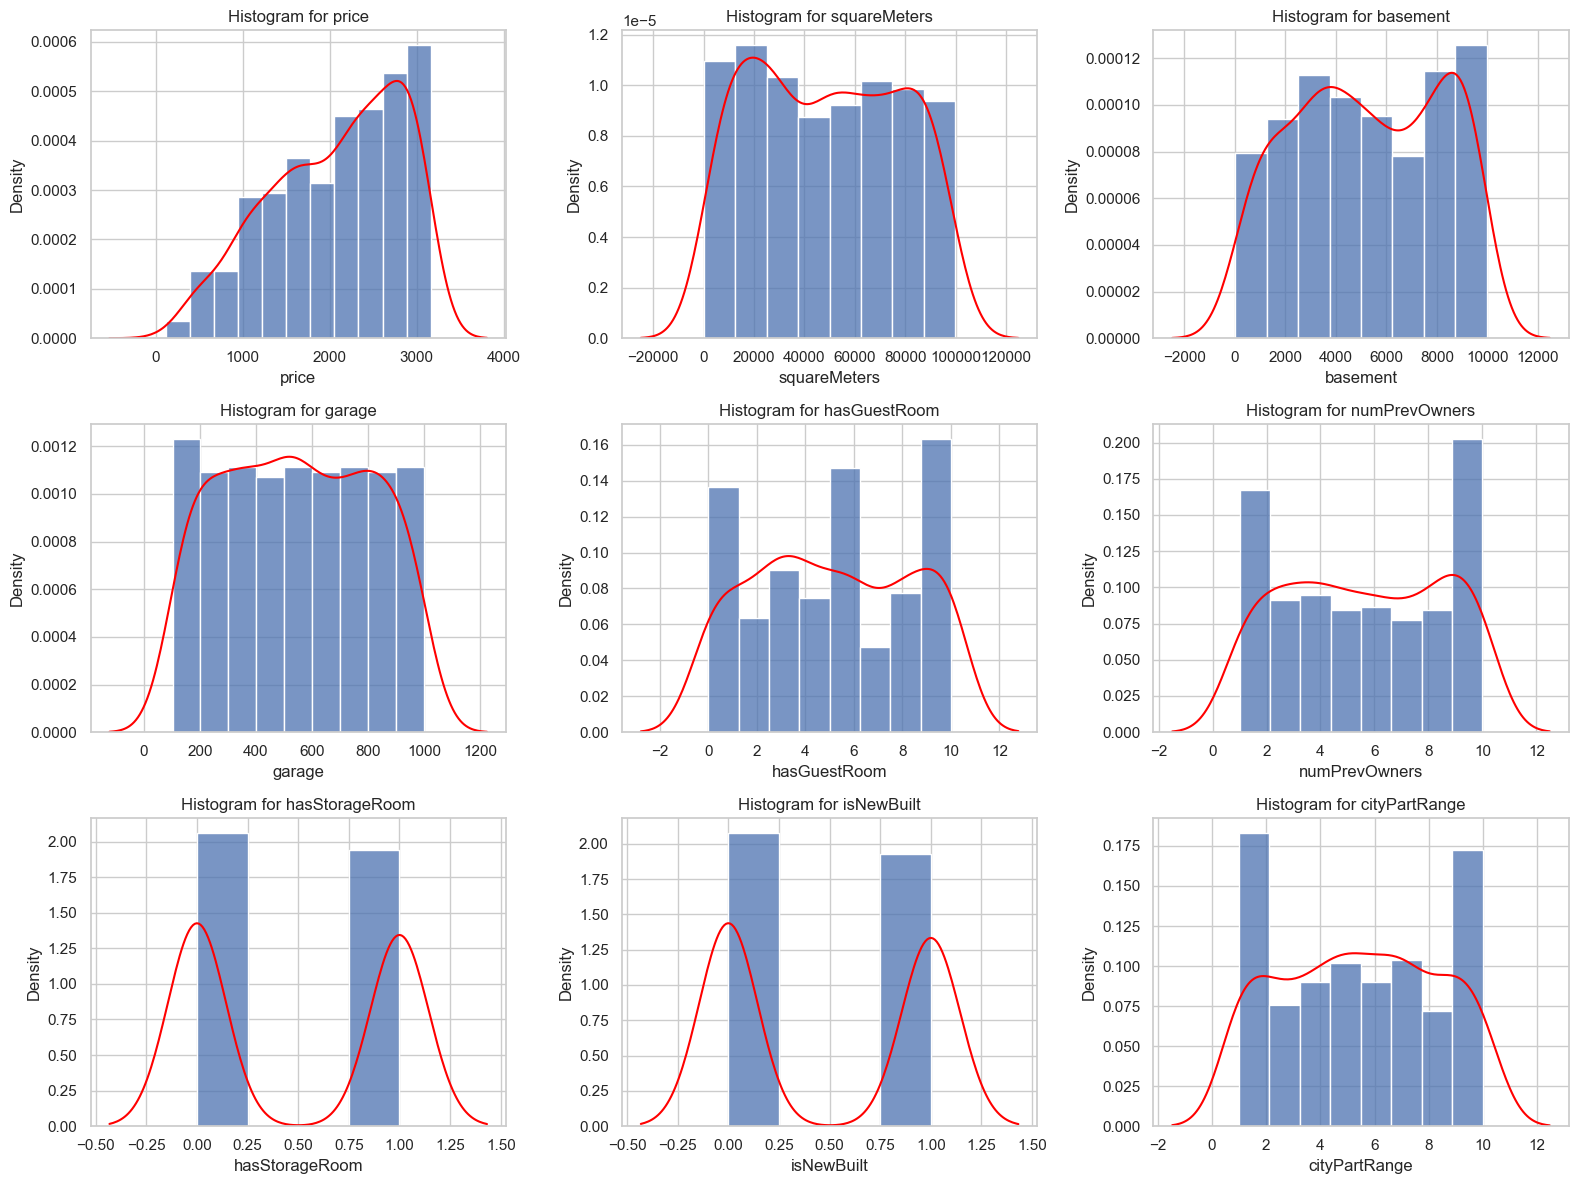

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))


axes = axes.flatten()


for i, col in enumerate(data.columns):
    sns.histplot(data[col], stat="density", bins='fd', ax=axes[i])
    sns.kdeplot(data[col], color="red", ax=axes[i], legend=False)
    axes[i].set_title("Histogram for " + col)
    axes[i].set_xlabel(col)


plt.tight_layout()


plt.show()

Density plots offer a deeper understanding of modality, skewness, and the variability within the dataset. The density plot of the variable 'price' reveals a distribution characterized by a degree of negative skewness. This indicates that the majority of the data points are concentrated towards higher values, contributing to a long left tail. However, an intriguing aspect of this distribution is the presence of extreme values towards the right end of the plot. These outliers, with exceptionally large prices, significantly impact the overall shape of the distribution, creating a rightward extension beyond the typical range of values. The combination of a negative skew and the presence of extreme values suggests a complex pattern in the 'price' variable's distribution.

The density plot of the categorical binary variables 'hasStorageRoom' and 'isNewBuilt' reveals intriguing patterns in their distribution. These variables exhibit two distinct peaks, indicating the presence of two prominent modes in their density distribution. This bimodal nature suggests that the dataset contains two well-defined subgroups within each variable. The density plot provides a visual representation of the density distribution, offering valuable insights into the distributional characteristics of these categorical binary features.

'cityPartRange' is another categorical variable, and from its density plot we see more density on level 1 and level 8 of the 8 level categories. 

The density plot of the 'numPrevOwners' variable presents a bimodal distribution, showcasing two distinct peaks. This bimodality suggests the presence of two prevalent modes or patterns within the data. 

On the other hand, the density plot for the 'hasGuestRoom' variable reveals a multimodal distribution characterized by three distinct peaks. This indicates the existence of three prevalent modes or clusters within the data. The multimodality suggests that the 'hasGuestRoom' variable is influenced by multiple factors or conditions, leading to the presence of distinct groups with varying densities.

Finally, the density plots for the variables 'squareMeters,' 'basement,' and 'garage' all exhibit bimodal distributions.


### (c) Identify if there are any non-linearities within your variables. What transformations should you perform to make them linear? What would happen if you included non- linear variables in your regression models without transforming them first?

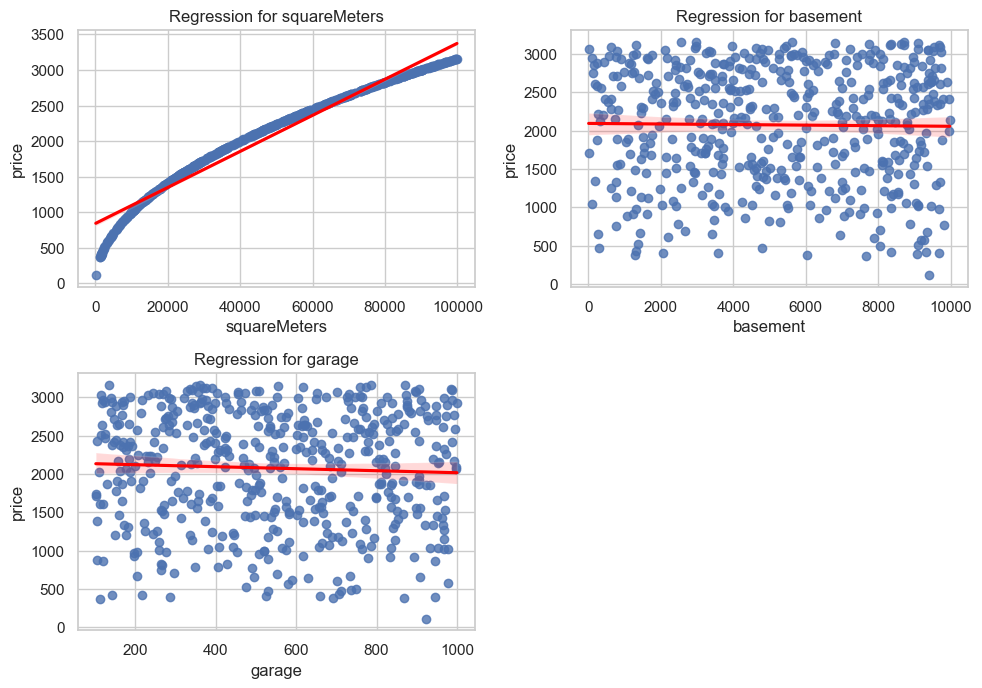

In [34]:
y = data["price"]
x_data = ["squareMeters", "basement", "garage"].copy()

# Create a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, x in enumerate(x_data):
    sns.regplot(data=data, x=x, y=y, ax=axes[i], line_kws={'color': 'red'})
    axes[i].set_title(f"Regression for {x}")

# Hide the empty subplot if present
if len(x_data) < len(axes):
    for j in range(len(x_data), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

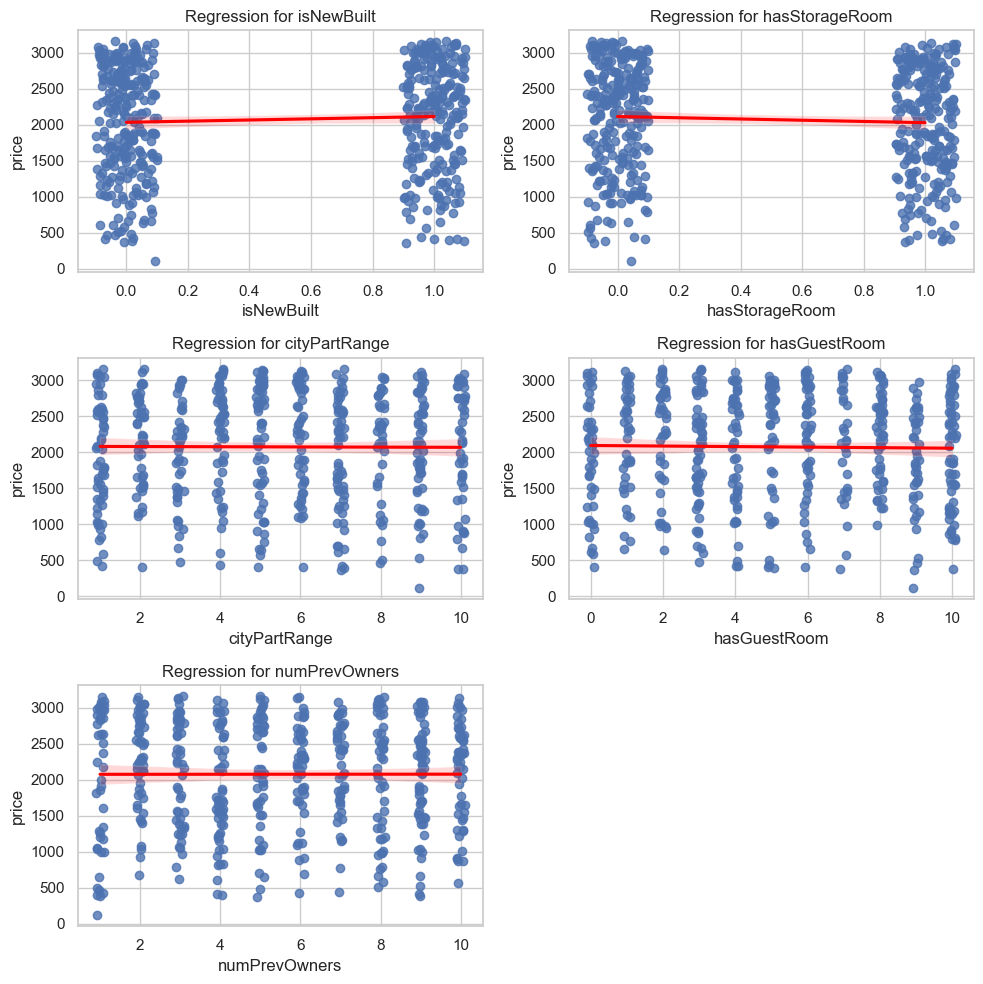

In [35]:
y = 'price'
x_data2 = ['isNewBuilt','hasStorageRoom',"cityPartRange",  "hasGuestRoom", "numPrevOwners"]

# Create a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, x in enumerate(x_data2):
    sns.regplot(data=data, x=x, y=y, ax=axes[i], line_kws={'color': 'red'},x_jitter=0.1,y_jitter=0.1)
    axes[i].set_title(f"Regression for {x}")

# Hide the empty subplot if present
if len(x_data2) < len(axes):
    for j in range(len(x_data2), len(axes)):
        fig.delaxes(axes[j])    

plt.tight_layout()
plt.show()

As can be seen from the scatter plots with both quantitative and factor variables, the relationship is not linear. We have transformed price with a square-root transformation to get a robust model that is as close to linearity as possible, and the factor variables have been jittered to get a better idea of the observations. But the relationship of the quantitative variables, except 'squareMeters', and factor variables, with 'price' appears to be non-linear. 




If non-linear variables are included in our regression models without prior transformation, we may have biased parameter estimates. This is due to the fact that linear regression assumes there is a linear relationship between the x and y variables which can lead to inaccurate inferences about the impact of predictors on the response variable. The model will also have a poor fit to data and it might struggle to explain the variation in the response variable, reducing predictive accuracy. Non-linearity often results in non-constant variance of residuals, leading to heteroscedasticity. This can make it challenging to trust the model's predictions and interpretations leading to misleading results and conclusions, as the relationships between predictors and the response are inadequately captured.

### (d) Comment on any outliers and/or unusual features of your variables, and then justify their removal, exclusion or imputation.
    - As seen in the boxplot below for price, and previously in the boxplots for all variables, there are no outlying values.
    

<Axes: >

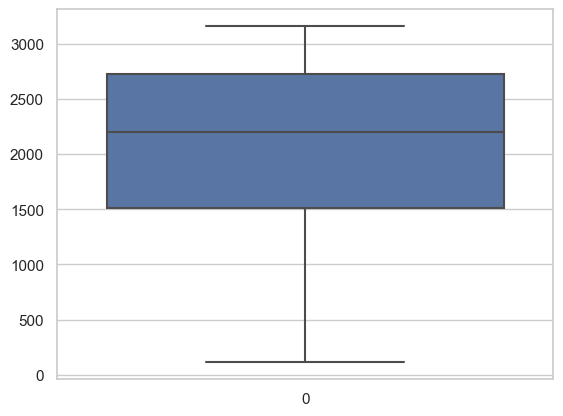

In [36]:
sns.boxplot(data.price)

### (e) If you have any NAs, remove them or impute them using any of the methods discussed in class, but make sure to justify your choice.

- There are no NA values in our data.

In [37]:
data.isnull().sum()

price             0
squareMeters      0
basement          0
garage            0
hasGuestRoom      0
numPrevOwners     0
hasStorageRoom    0
isNewBuilt        0
cityPartRange     0
dtype: int64

## Question 3: Model Building

We start of by running a regression with all the variables we finalised using Boruta Algorithm and standard techniques: 

In [14]:
# price column has already been changed to sqrt(price)
model_og = smf.ols('price ~ squareMeters + basement + garage + hasGuestRoom + numPrevOwners + C(cityPartRange) +C(isNewBuilt) + C(hasStorageRoom)', data).fit()
model_og.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     834.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:36:05   Log-Likelihood:                -3213.8
No. Observations:                 505   AIC:                             6462.
Df Residuals:                     488   BIC:                             6533.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                807.4664     34.748     23.238      0.000     739.191     875.741
C(cityPartRange)[T.2]     34.5175     28.331      1.218      0.224     -21.149      90.184
C(cityPartRange)[T.3]     31.0809     28.943      1.074      0.283     -25.787      87.949
C(cityPartRange)[T.4]     -3.0513     27.825     -0.110      0.913     -57.723      51.620
C(cityPartRange)[T.5]    -30.7836     26.855     -1.146      0.252     -83.550      21.983
C(cityPartRange)[T.6]      0.9868     27.776      0.036      0.972     -53.589      55.563
C(cityPartRange)[T.7]     -6.4629     26.633     -0.243      0.808     -58.793      45.867
C(cityPartRange)[T.8]     13.3825     29.339      0.456      0.648     -44.264      71.029
C(cityPartRange)[T.9]      7.7825     27.347      0.285      0.776     -45.949      61.514
C(cityPartRange)[T.10]   -19.1361     28.655     -0.668      0.505     -75.438      37.166
C(isNewBuilt)[T.1]         3.4689     12.885      0.269      0.788     -21.848      28.786
C(hasStorageRoom)[T.1]     4.4295     12.842      0.345      0.730     -20.803      29.662
squareMeters               0.0254      0.000    113.503      0.000       0.025       0.026
basement                  -0.0012      0.002     -0.552      0.581      -0.006       0.003
garage                    -0.0063      0.025     -0.255      0.799      -0.055       0.042
hasGuestRoom               1.7101      1.998      0.856      0.392      -2.216       5.636
numPrevOwners              5.3865      2.235      2.410      0.016       0.996       9.777
==============================================================================
Omnibus:                      136.208   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.399
Skew:                          -1.409   Prob(JB):                     2.93e-67
Kurtosis:                       5.572   Cond. No.                     5.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the summary statistics of the entire model: 

<u>1. Model Fit<u/>
    
- **R-squared** : The model explains approximately 96.5% of the variance in the dependent variable.
    
<u>2. Model Significance<u/>
- A high **F-statistic** (834.7) and a low **p-value** (0.00) suggest that the model is statistically significant. The probability associated with the F-statistic is close to zero, indicating that the model is likely not a result of random chance.

<u>3. Coefficients <u/>

- Intercept is highly significant as the p-value of 0.00 
- Only 'squareMeters' and 'numPrevOwners' have significant coefficients with p-values 0.00 and 0.016 respectively
    
We will also keep in mind the values of the following, to compare with the following models:
    
    1. AIC : 6462
    2. BIC : 6533
    3. Skew : -1.409, slightly left skewed
    4. Kurtosis : 5.572
    5. JB Test: 306.399, residuals are not normally distributed

## Mallow's CP

In [39]:
subdat = data[['price', 'squareMeters', 'basement', 'garage', 'hasGuestRoom', 'numPrevOwners', 'isNewBuilt', 'cityPartRange', 'hasStorageRoom']].copy()

In [40]:
import itertools

y = data['price']
y_pred=model_og.fittedvalues


storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 9 # number of parameters in orginal model (includes y-intercept)

df_concat = []

for L in range(1, len(subdat.columns[1:]) + 1):
    for subset in itertools.combinations(subdat.columns[1:], L):
        
        # join the strings in the data together
        formula1 = 'price~'+'+'.join(subset)
        
        # get the cp
        results = smf.ols(formula=formula1, data = data).fit()
        y_sub = results.fittedvalues
        p = len(subset)+1 # number of parameters in the subset model (includes y-intercept)
        
        cp = mallow.mallow(y, y_pred,y_sub, k, p)
        
        new_row = pd.DataFrame({'Variables': [subset], 'CP': [cp]})
        df_concat.append(new_row)
        

if df_concat:
    storage_cp = pd.concat(df_concat, ignore_index=True)

In [41]:
storage_cp.sort_values(by='CP')

,Variables,CP
11,"(squareMeters, numPrevOwners)",7.378159
52,"(squareMeters, numPrevOwners, cityPartRange)",8.317835
47,"(squareMeters, hasGuestRoom, numPrevOwners)",8.826842
38,"(squareMeters, basement, numPrevOwners)",9.066803
51,"(squareMeters, numPrevOwners, isNewBuilt)",9.147435
...,...,...
6,"(cityPartRange,)",13569.179507
4,"(numPrevOwners,)",13569.564675
83,"(hasGuestRoom, numPrevOwners, cityPartRange)",13569.573954
67,"(basement, numPrevOwners, cityPartRange)",13570.234361


**Model Selection Based on Mallow's CP**

Selecting 3 models with the lowest Mallow's CP scores, as it signifies a better fit for the regression model. 

- Lower scores indicate a better balance between model complexity and goodness of fit, ensuring that the chosen models effectively explain the data while avoiding the pitfalls of overfitting.

## Model Selection 

In [42]:
model_1 = storage_cp.loc[11]
model_1 = model_1.to_dict()

model_2 = storage_cp.loc[52]
model_2 = model_2.to_dict()

model_3 = storage_cp.loc[47]
model_3 = model_3.to_dict()



# Print the model's values
print("Top Choice based off of Mallow's CP: ")
print(model_1)
print("\nSecond Model: ")
print(model_2)
print("\nThird Model: ")
print(model_3)

Top Choice based off of Mallow's CP: 
{'Variables': ('squareMeters', 'numPrevOwners'), 'CP': 7.37815881241022}

Second Model: 
{'Variables': ('squareMeters', 'numPrevOwners', 'cityPartRange'), 'CP': 8.317835321461928}

Third Model: 
{'Variables': ('squareMeters', 'hasGuestRoom', 'numPrevOwners'), 'CP': 8.826842113247778}


**Model 1** 

$$ sqrt(price) = β0 + β1 (squareMeters) + β2 (numPrevOwners) $$

In [15]:
# Fit model 1
model1 = smf.ols('price~ squareMeters + numPrevOwners ', data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     6723.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:36:13   Log-Likelihood:                -3219.0
No. Observations:                 505   AIC:                             6444.
Df Residuals:                     502   BIC:                             6457.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       813.8110     17.597     46.248      0.000     779.239     848.383
squareMeters      0.0253      0.000    115.961      0.000       0.025       0.026
numPrevOwners     5.1892      2.196      2.363      0.019       0.875       9.504
==============================================================================
Omnibus:                      137.435   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.388
Skew:                          -1.433   Prob(JB):                     8.00e-67
Kurtosis:                       5.501   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Looking at the summary statistics of model 1**

**1. R-squared:** The model explains approximately 96.4% of the variance in the dependent variable.
    
**2. Model Significance:** A high **F-statistic** (6723) and a low **p-value** (0.00) suggest that the model is statistically significant. The probability associated with the F-statistic is close to zero, indicating that the model is likely not a result of random chance.

**3. Coefficients:** All the coefficients are highly significant. 
    
- Comparing to the base model,
    
    1. AIC : 6444 (decreased)
    2. BIC : 6457 (decreased)
    3. Skew : -1.433
    4. Kurtosis : 5.501 
    5. JB Test: 304.388, residuals are not normally distributed

**Model 2**

$$ sqrt(price) = β0 + β1 (squareMeters) + β2 (numPrevOwners) + β3 (cityPartRange) $$

In [16]:
# Fit model 2
model2 = smf.ols('price~ squareMeters + numPrevOwners + C(cityPartRange)', data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1223.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:36:16   Log-Likelihood:                -3214.5
No. Observations:                 505   AIC:                             6453.
Df Residuals:                     493   BIC:                             6504.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                810.9448     24.957     32.494      0.000     761.910     859.980
C(cityPartRange)[T.2]     33.2151     28.150      1.180      0.239     -22.094      88.524
C(cityPartRange)[T.3]     29.7022     28.776      1.032      0.302     -26.837      86.241
C(cityPartRange)[T.4]     -3.3012     27.613     -0.120      0.905     -57.554      50.952
C(cityPartRange)[T.5]    -31.9547     26.637     -1.200      0.231     -84.291      20.382
C(cityPartRange)[T.6]      0.0888     27.599      0.003      0.997     -54.137      54.315
C(cityPartRange)[T.7]     -8.0954     26.459     -0.306      0.760     -60.082      43.892
C(cityPartRange)[T.8]     13.2985     29.219      0.455      0.649     -44.110      70.707
C(cityPartRange)[T.9]      8.2221     27.184      0.302      0.762     -45.189      61.634
C(cityPartRange)[T.10]   -19.9659     28.427     -0.702      0.483     -75.820      35.888
squareMeters               0.0254      0.000    114.415      0.000       0.025       0.026
numPrevOwners              5.3906      2.201      2.449      0.015       1.067       9.715
==============================================================================
Omnibus:                      136.757   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.864
Skew:                          -1.415   Prob(JB):                     1.41e-67
Kurtosis:                       5.573   Cond. No.                     5.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Looking at the summary statistics of model 2**

**1. R-squared:** The model explains approximately 96.5% of the variance in the dependent variable.
    
**2. Model Significance:** A low **F-statistic** (1223) and a low **p-value** (0.00) suggest that the model is statistically significant. The probability associated with the F-statistic is close to zero, indicating that the model is likely not a result of random chance.

**3. Coefficients:** Intercept, squareMeters and numPrevOwners are highly significant with a p-value of 0.00,0.00 and 0.015. However, the new added variable 'cityPartRange' is not significant with a p-value of more than 0.05 for all treatment groups.
    
- Comparing to the base model,
    
    1. AIC : 6453
    2. BIC : 6504
    
    AIC and BIC values have increased
    
    3. Skew : -1.415
    4. Kurtosis : 5.573
    5. JB Test: 307.864, residuals are not normally distributed

**Model 3**

$$ sqrt(price) = β0 + β1 (squareMeters) + β2 (numPrevOwners) + β3 (hasGuestRoom) $$

In [45]:
# Fit model 3
model3 = smf.ols('price~ squareMeters + hasGuestRoom + numPrevOwners', data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     4478.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:18:04   Log-Likelihood:                -3218.8
No. Observations:                 505   AIC:                             6446.
Df Residuals:                     501   BIC:                             6462.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       805.7572     20.705     38.915      0.000     765.077     846.437
squareMeters      0.0253      0.000    115.895      0.000       0.025       0.026
hasGuestRoom      1.4578      1.973      0.739      0.460      -2.418       5.334
numPrevOwners     5.2633      2.199      2.393      0.017       0.942       9.584
==============================================================================
Omnibus:                      138.550   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.979
Skew:                          -1.437   Prob(JB):                     2.96e-68
Kurtosis:                       5.554   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Looking at the summary statistics of model 3**

**1. R-squared:** The model explains approximately 96.4% of the variance in the dependent variable.
    
**2. Model Significance:** A high **F-statistic** (4478) and a low **p-value** (0.00) suggest that the model is statistically significant. The probability associated with the F-statistic is close to zero, indicating that the model is likely not a result of random chance.

**3. Coefficients:** Intercept, squareMeters and numPrevOwners are highly significant with pvalue (0.00, 0.00 and 0.017). 'hasGuestRoom' is insignificnat with a high p-value of 0.460. 
    
- Comparing to the base model,
    
    1. AIC : 6446 (decreased)
    2. BIC : 6462 (decreased)
    3. Skew : -1.437
    4. Kurtosis : 5.554	
    5. JB Test: 310.979, residuals are not normally distributed

### Comparing Top 3 Models 

Model 1 = Price ~ squareMeters + numPrevOwners

Model 2 = Model 1 + cityPartRange

Model 3 = Model 1 + hasGuestRoom


<u>Model 2 vs Model 3 <u/>
    
- Both models have similar values of AIC, BIC, F-stat, Skew, Kurtosis and JB value
- The added variable in model 3, 'hasGuestRoom' has a higher p-value (0.460) than the p-value of the added variable in model 2, cityPartRange, and all it's treatment groups.
    
**We drop Model 3, hence do not include 'hasGuestRoom' in further model evaluations**
    
<u>Model 1 vs Model 2 <u/>
    
Since the values are comparable to model 1, we will check to see if there are significant interaction terms of 'cityPartRange' that would increase the robustness of our model
    
**We are dropping model 2 since cityPartRange is not statistically significant and adds multicollinearity to the model.**      

### Selection of Model 1 

Based on the previous comparisons, we would select the variables in the following model to check for the significance of interaction and quadratic terms. 

$$ sqrt(price) = β0 + β1 (squareMeters) + β2 (numPrevOwners) $$


#### Test for multicollinearity

In [46]:
# extract matrices using patsy:
y, X = pt.dmatrices('price~ squareMeters + numPrevOwners ',
                    data=data, return_type='dataframe')

# Create place to store VIF values
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)


         feature       VIF
0      Intercept  7.715279
1   squareMeters  1.000382
2  numPrevOwners  1.000382


The VIF values for both squareMeters and numPrevOwners were found to be approximately 1.000, indicating that the selected predictors are not highly correlated with each other, and therefore, the regression model is not affected by multicollinearity.

#### Test for Interaction Terms

1. ( squareMeters*numPrevOwners)

In [17]:
print(blue("Interaction Model",['bold']))
mod = smf.ols(formula='price~ squareMeters + numPrevOwners + squareMeters*numPrevOwners', data = data).fit()
mod.summary()

Interaction Model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     4476.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:36:23   Log-Likelihood:                -3218.9
No. Observations:                 505   AIC:                             6446.
Df Residuals:                     501   BIC:                             6463.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    803.6186     26.416     30.422      0.000     751.720     855.517
squareMeters                   0.0255      0.000     56.518      0.000       0.025       0.026
numPrevOwners                  7.0877      4.276      1.658      0.098      -1.312      15.488
squareMeters:numPrevOwners -3.842e-05   7.42e-05     -0.518      0.605      -0.000       0.000
==============================================================================
Omnibus:                      135.642   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.058
Skew:                          -1.422   Prob(JB):                     5.15e-65
Kurtosis:                       5.446   Cond. No.                     1.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
tbl = mod.summary2().tables[1]
tbl

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,803.618630,26.415522,30.422212,6.437482e-116,751.719781,855.517479
squareMeters,0.025549,0.000452,56.518227,1.570763e-219,0.024661,0.026437
numPrevOwners,7.087712,4.275535,1.657737,9.799661e-02,-1.312477,15.487900
squareMeters:numPrevOwners,-0.000038,0.000074,-0.517650,6.049308e-01,-0.000184,0.000107


In [49]:
hypothesis = ["squareMeters:numPrevOwners = 0"]

test = mod.f_test(hypothesis)

print(' F-statistic =', '{:8.4f}'.format(test.fvalue),'\n', 'p-value =', '{:10.8f}'.format(test.pvalue))


 F-statistic =   0.2680 
 p-value = 0.60493084


The hypotheses being tested:

Null hypothesis (H0): The coefficients for the interaction term (squareMeters:numPrevOwners) are very close to zero.

Conclusion: The p-value of 0.60493084 indicates that we do not reject the null, and hence the the interaction term does not contribute to explaining the variability in the dependent variable (price).

#### Test for Quadratic Term

1. numPrevOwners**2

In [18]:
# Fit model 1 with numPrevOwners**2
model_f= smf.ols('price~ squareMeters + numPrevOwners + I(numPrevOwners**2) ', data).fit()
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     4512.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:36:28   Log-Likelihood:                -3217.0
No. Observations:                 505   AIC:                             6442.
Df Residuals:                     501   BIC:                             6459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               771.9489     27.080     28.506      0.000     718.745     825.153
squareMeters              0.0254      0.000    116.321      0.000       0.025       0.026
numPrevOwners            25.2796     10.140      2.493      0.013       5.358      45.201
I(numPrevOwners ** 2)    -1.7988      0.886     -2.029      0.043      -3.540      -0.057
==============================================================================
Omnibus:                      133.690   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.837
Skew:                          -1.411   Prob(JB):                     5.18e-63
Kurtosis:                       5.381   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

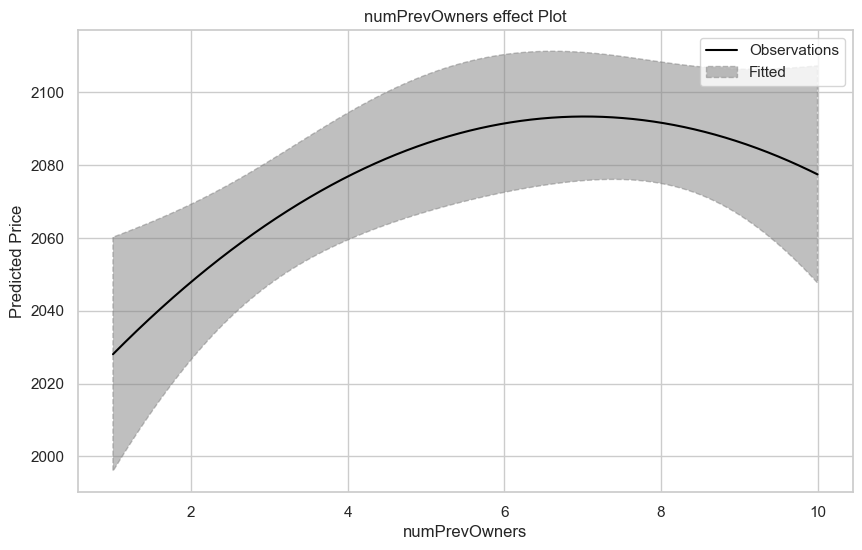

In [51]:
new_data = data[['numPrevOwners']].copy()

# Generate predictions over range
new_data = pd.DataFrame({'numPrevOwners': np.linspace(data['numPrevOwners'].min(), data['numPrevOwners'].max(), 2000),
                         'squareMeters': data['squareMeters'].mean()})

predictions = model_f.get_prediction(new_data)

# Generate table with intervals for each x
predictions = predictions.summary_frame(alpha=0.05)

plt.figure(figsize = (10, 6))

plt.plot(new_data['numPrevOwners'], predictions["mean"], color = "black")

plt.title('numPrevOwners effect Plot')
plt.xlabel("numPrevOwners")
plt.ylabel("Predicted Price")

# confidence Intervals
plt.fill_between(new_data['numPrevOwners'], predictions["mean_ci_lower"], predictions["mean_ci_upper"],
                 color = "grey", linestyle = '--', alpha = .5)

# Fun fact - the legend is labelled in the order you draw each plot element!
plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

In [52]:
h = ["numPrevOwners=0", "I(numPrevOwners ** 2)=0"]
model_f.f_test(h)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=4.868284184557112, p=0.008054031386799936, df_denom=501, df_num=2>

The coefficients for all terms, including the interaction effect, are statistically significant. On testing the hypothesis of whether the effect of numPrevOwners or its quadratic term is zero, we reject the null. Hence the coefficients are statistically significantly different from 0 and hence play a role in the model predictions. 

**Model in Consideration:**

$$ sqrt(price) = β0 + β1 (squareMeters) + β2 (numPrevOwners) + β3 (numPrevOwners**2)$$ 

    

#### - Test for heteroskedasticity

In [53]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant 

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_f.resid, model_f.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

BP Results:
[('Lagrange multiplier statistic', 55.31772508835911), ('p-value', 5.8739352910661295e-12), ('f-value', 20.5435272972927), ('f p-value', 1.4373285264345825e-12)]


The p-value was less than 0.05 so we reject null hypothesis and accept presence of heteroskedasticity. Given the very low p-values for both the Lagrange Multiplier Statistic and the F-Statistic, we reject the null hypothesis. Therefore, there is indication of heteroscedasticity in the regression model, suggesting that the variance of the errors is not constant across all levels of the independent variables

#### - Test for model misspecification.

In [54]:
test = oi.reset_ramsey(model_f, degree=2)

print(blue("Ramsey-RESET:",['bold']))
print(test)

Ramsey-RESET:
<F test: F=2373.867158875416, p=5.240705166015728e-192, df_denom=500, df_num=1>


   - The p-value is less than the 0.05 significance level, therefore we reject the null hypothesis, and say that the model seems to be misspecified.

### SELECTING FINAL MODEL 

$$ sqrt(price) = β0 + β1 (squareMeters) + β2 (numPrevOwners) + β3 (numPrevOwners**2)$$ 


In [19]:
model_f = smf.ols('price~ squareMeters +  numPrevOwners + I(numPrevOwners**2)', data).fit()
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     4512.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:36:37   Log-Likelihood:                -3217.0
No. Observations:                 505   AIC:                             6442.
Df Residuals:                     501   BIC:                             6459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               771.9489     27.080     28.506      0.000     718.745     825.153
squareMeters              0.0254      0.000    116.321      0.000       0.025       0.026
numPrevOwners            25.2796     10.140      2.493      0.013       5.358      45.201
I(numPrevOwners ** 2)    -1.7988      0.886     -2.029      0.043      -3.540      -0.057
==============================================================================
Omnibus:                      133.690   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.837
Skew:                          -1.411   Prob(JB):                     5.18e-63
Kurtosis:                       5.381   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Regression Summary

R-squared of 0.964 indicates that approximately 90.4% of the variability in price is explained by the model's predictors. The high value shows that the model is a good fit and the coefficients for the predictors are statistically significant.

Based on the F-statistic (1567), the overall significance of the model is highly significant. The probability that all coefficients are zero is very low.

The significant values for Omnibus and Jarque-Bera tests suggest departure from normality.

The negative coefficient of I(numPrevOwners ** 2) suggests a non-linear relationship of numprevOwners with price. Initially positive, its squared term turns negative, suggesting a curvilinear effect on 'price'. 

The interaction between cityPartRange and squareMeters impacts price (as suggested by the statistically significant parameter estimate).

### Use cross-validation to evaluate your model’s performance.

In [56]:
data['numPrevOwners_sq'] = data['numPrevOwners'] ** 2
x = data[['squareMeters', 'numPrevOwners','numPrevOwners_sq']]
y = data['price']

regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

MAE: 108.44396094854203
MSE: 19141.17815070614
RMSE: 138.3516467220616
5-Fold CV RMSE Scores: [-159.22264649 -146.01776836 -140.38765097 -124.04020968 -142.97709563]


1. **Mean Absolute Error** MAE gives the average absolute difference between predicted and actual values. In our case, with a range of prices from 115 to 3160.571167, an MAE of 108.44 indicates that, on average, your model's predictions deviate by approximately 108.44 units. An MAE of this magnitude might be considered relatively high, since it is a significant portion of your price range.

2. **Mean Squared Error**:MSE measures the average squared differences between predicted and actual values. Similarly, an MSE of 19141.18 suggests that the squared errors are quite large on average. 

3. **Root Mean Squared Error**: RMSE is the square root of the MSE and provides an interpretable scale. In your case, an RMSE of 138.35 means that, on average, your model's predictions deviate by approximately 138.35 units.

The 5-fold cross-validation RMSE scores further assess the model's generalization performance, and our score tells us that our model is overfitting. Lower values would generally be considered better, as they indicate lower average errors in predictions. 

### Evaluate transformations of variables

In [57]:
import statsmodels.stats.diagnostic as smd

# Fit the model
model_ff = smf.ols('price ~ squareMeters + numPrevOwners', data).fit()

# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model_ff)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))

Linearity Test Results:
[('t-stat', 0.9036988232371804), ('p-value', 0.3665894366376623)]


Based on on the Harvey-Collier test, we accept the null hypothesis of linearity and say that our model is linear and does not require any transformations.

### Look at Cook’s distance Plot, Residuals Plot, QQ-Plot, etc.

#### Cook's Distance Plot

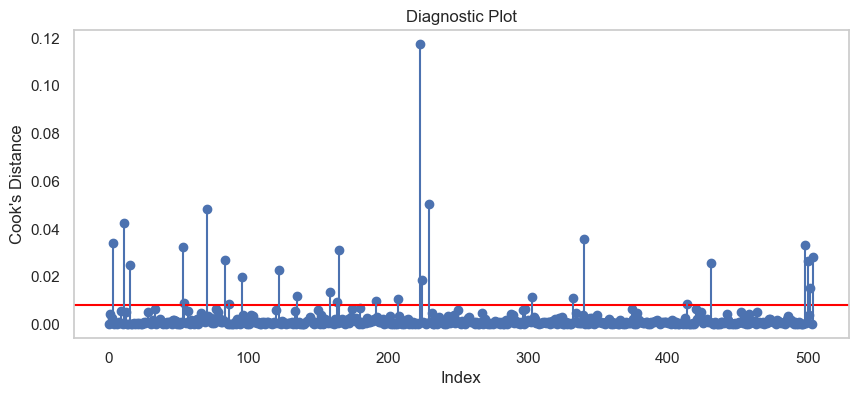

In [20]:
cooks_distance = model_f.get_influence().cooks_distance
threshold = 4/len(data)

plt.figure(figsize = (10, 4))
plt.scatter(data.index, cooks_distance[0])
plt.axhline(threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()



###### Based on the Cook's Distance plot, and setting a threshold of 4/len(data), we can observe a number of outliers. We will drop these outliers and evaluate the model with the cleaned data.

In [21]:
# Find influential observations using DFFITS criterion

influential_indices = [i for i, c in enumerate(cooks_distance[0]) if c > threshold]

# Dataset without influential observations
data_c = data.drop(influential_indices)

model_final = smf.ols('price~ squareMeters + numPrevOwners + I(numPrevOwners**2) ', data_c).fit()

print(blue("Model after dropping outliers:",['bold']))
model_final.summary()

Model after dropping outliers:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     7320.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:36:50   Log-Likelihood:                -2856.9
No. Observations:                 477   AIC:                             5722.
Df Residuals:                     473   BIC:                             5739.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               910.6570     20.075     45.363      0.000     871.210     950.104
squareMeters              0.0239      0.000    147.897      0.000       0.024       0.024
numPrevOwners             9.6574      7.268      1.329      0.185      -4.625      23.939
I(numPrevOwners ** 2)    -0.6334      0.632     -1.003      0.317      -1.875       0.608
==============================================================================
Omnibus:                       51.628   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.262
Skew:                          -0.908   Prob(JB):                     4.09e-15
Kurtosis:                       3.198   Cond. No.                     2.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Final Model with clean Data**

**R-squared** of significantly increases to 0.979 indicates that approximately 97.9% of the variability in price is explained by the model's predictors. The high value shows that the model is a good fit and the coefficients for the predictors are statistically significant.

Based on the F-statistic (7320), the overall significance of the model has also increased. The probability that all coefficients are zero is very low.

The significant values for Omnibus and Jarque-Bera tests suggest departure from normality, with the same conslusion.

- The only difference we observe that the coefficents with the variable 'numOrevOwners' have now become insigniicant. 

### Use cross-validation to evaluate your model’s performance.

In [22]:
data_c['numPrevOwners_sq'] = data_c['numPrevOwners'] ** 2

x = data_c[['squareMeters', 'numPrevOwners','numPrevOwners_sq']]
y = data_c['price']

regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


regr = LinearRegression()
regr.fit(x_train, y_train)


y_pred = regr.predict(x_test)



print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

MAE: 78.71288547787996
MSE: 9888.737906692639
RMSE: 99.44213345807017
5-Fold CV RMSE Scores: [-98.69882819 -99.41976781 -94.45723337 -97.17557206 -95.47190214]


**Comparing to Model without Clean Data**

We observe that all, MAE, MSE and RMSE values have significanlty decreased. This indicates that, on average, the new model's predictions have a smaller absolute deviation from the actual values, suggesting improved accuracy in predicting the target variable.

The new model's 5-fold Cross-Validation RMSE scores show improvements across all folds compared to the previous model. The less negative values suggest a reduction in average prediction errors, indicating improved generalization performance across different subsets of the data.

**Conclusion** Considering that the model overall has become a better fit for our 'price' variable and that the corss-validation values have significantly decreased, we will keep the model with the cleaned data. 

### Residuals Plot

In [61]:
from statsmodels.graphics.regressionplots import plot_ceres_residuals

In [62]:
def ceres_plot(model, data_c, variable):
    
    # produce plot
    plot_ceres_residuals(model_f, variable)
    ax = plt.gca()
    
    # don't show plot in notebook
    plt.close()
    
    # Pull datapoints from scatterplot from the statsmodels plot
    line = ax.lines[0]
    X = line.get_xdata()
    Y = line.get_ydata()
    
    # Store the results into format that works with seaborn
    df = pd.DataFrame(np.array([X,Y]).T, columns = [variable, "CERES Resdiduals"])
    plt.figure(figsize = (10, 6))
    
    # plot the results in a way similar to R
    sns.regplot(x = variable, y = "CERES Resdiduals", data =df, lowess = True)
    sns.regplot(x = variable, y = "CERES Resdiduals", data =df)
    
    plt.title("CERES Plot "+variable)

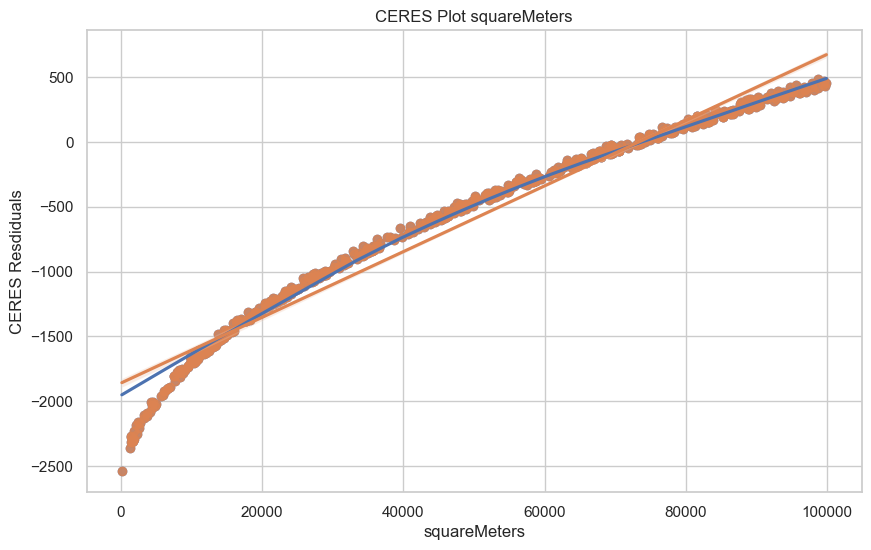

In [63]:
ceres_plot(model_final, data_c, 'squareMeters')

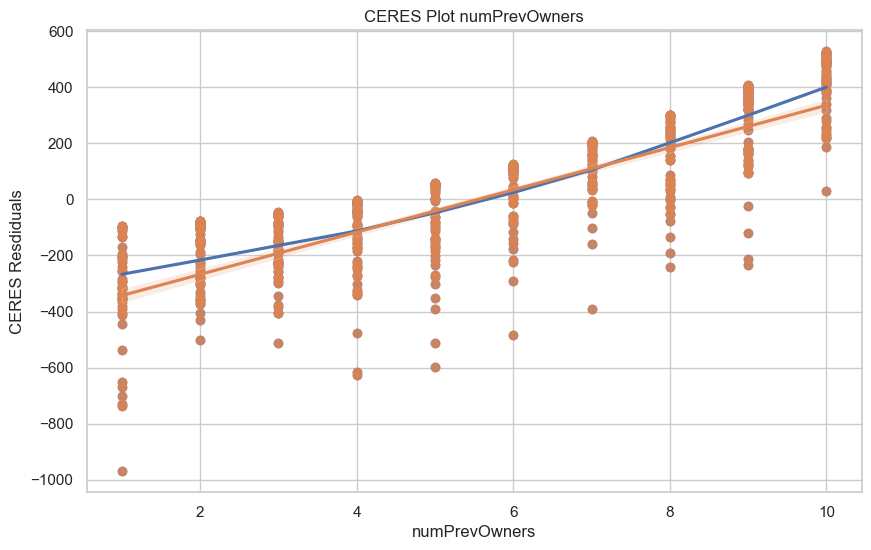

In [64]:
ceres_plot(model_final, data_c, 'numPrevOwners') 

##### The CERES plots were chosen due to observed non-linearity in the initial analysis, to visualise variable relationships in the regression model

The plot representing the relationship between 'squareMeters' and CERES residuals exhibits scatter points and a regression line that predominantly appear upward-facing. Despite a nearly straight-line pattern observed in both scatter points and the lowess smoother, there's a curve present, with points closely clustered. 

On the other hand, the plot for 'numPrevOwners' showcases discrete data ranging from 1 to 10, resulting in vertically aligned scatter points. The CERES plot for 'numPrevOwners' displays a consistent downward trend, indicating a potential non-linear relationship between 'numPrevOwners' and the residuals. While the variance appears relatively constant, scattered points deviating from the expected pattern suggest some unusual behavior or potential influential observations within specific ranges of 'numPrevOwners'.

### Testing for Heteroskedasticity

In [65]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant 

from simple_colors import *
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_final.resid, model_final.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

BP Results:
[('Lagrange multiplier statistic', 44.63603293199164), ('p-value', 1.1056392315636917e-09), ('f-value', 16.277060674909823), ('f p-value', 4.3959329071759237e-10)]



The Breusch-Pagan test, with a Lagrange multiplier statistic of 44.63 and an associated p-value of approximately 1.1056392315636917e-09, indicates evidence against homoscedasticity, suggesting the presence of heteroskedasticity in the model. The low p-value (below the conventional significance threshold of 0.05) suggests strong evidence against the null hypothesis of constant variance in the residuals.

Hence, based on this test, there's a high likelihood that the variance of the residuals is not constant across all observations. The presence of heteroskedasticity might impact the reliability of the coefficient estimates and standard errors, signaling a violation of one of the assumptions of classical linear regression models. 

### Testing for Model Misspecification

In [33]:
test = oi.reset_ramsey(model_final, degree=2)

print(blue("Ramsey-RESET:",['bold']))
print(test)

Ramsey-RESET:
<F test: F=4636.5621356832025, p=3.002757667661688e-246, df_denom=472, df_num=1>


### Diagnostic Plots

[Text(0.5, 33.249999999999986, 'Predicted'),
 Text(398.1818181818181, 0.5, 'Residuals')]

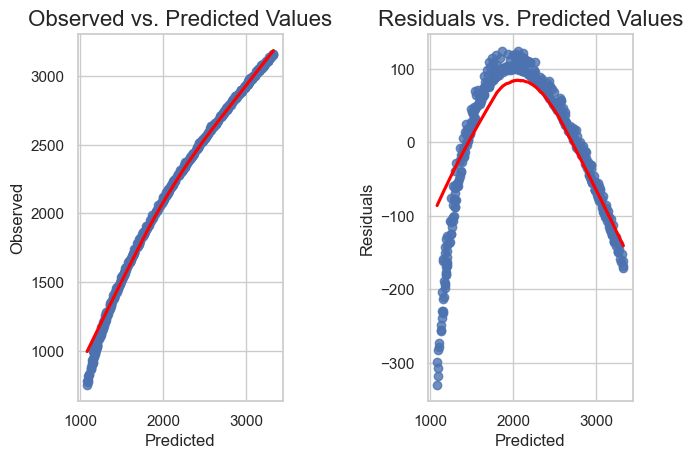

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
fig.tight_layout(pad=6.0)
sns.regplot(x=model_final.fittedvalues, y=data_c['price'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=model_final.fittedvalues, y=model_final.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

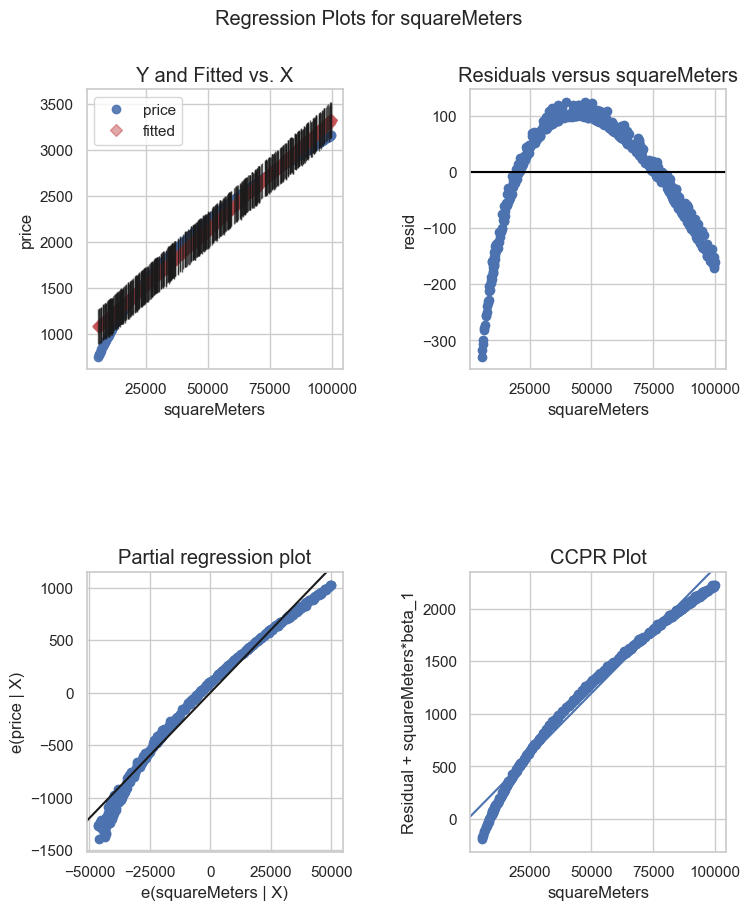

In [67]:
fig = sm.graphics.plot_regress_exog(model_final, "squareMeters")
fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

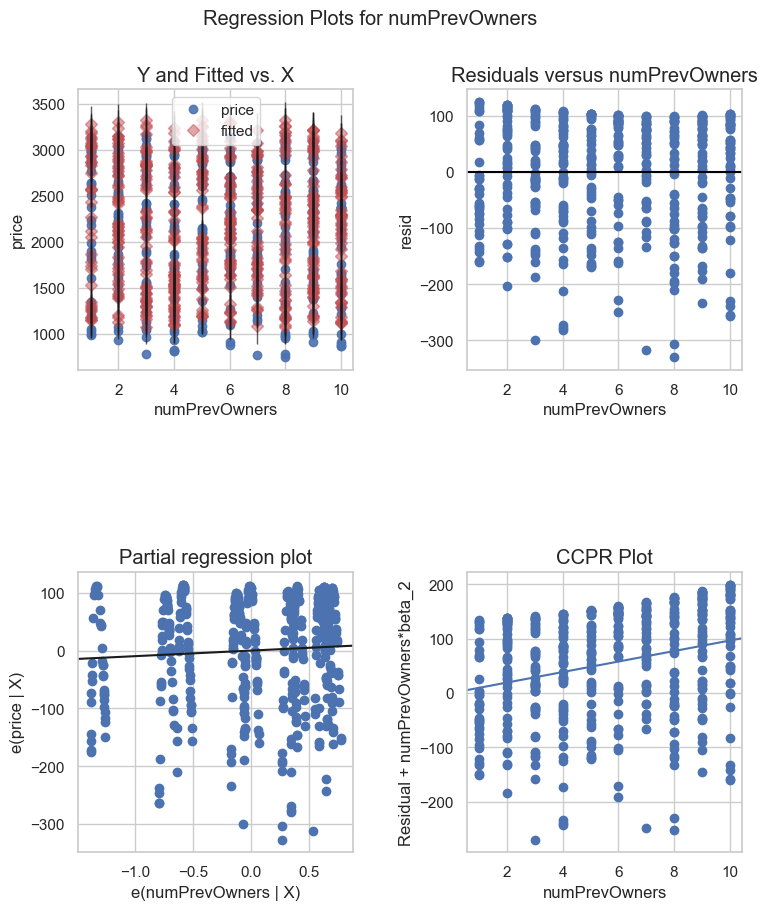

In [68]:
fig = sm.graphics.plot_regress_exog(model_final, "numPrevOwners")
fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

###### Diagnostic Plots: 

The plot depicting 'observed versus predicted values' displays an upward-sloping scatter closely aligned with the line, indicating a reasonably good fit.

However, the residuals versus predicted values plot reveals an inverted U shape, suggesting a pattern in the residuals concerning predicted values. 

This pattern echoes the diagnostic plot for residuals versus 'squareMeters', which also showcased a similar curved structure. The U-shaped pattern in the residuals signifies the presence of potential non-linear relationships or heteroskedasticity, mirroring the earlier observations from diagnostic checks. 

These insights emphasize the model's performance and signal the necessity for further investigation into potential non-linearity or heteroskedasticity in the relationship between predictors and residuals.

### QQ-Plot

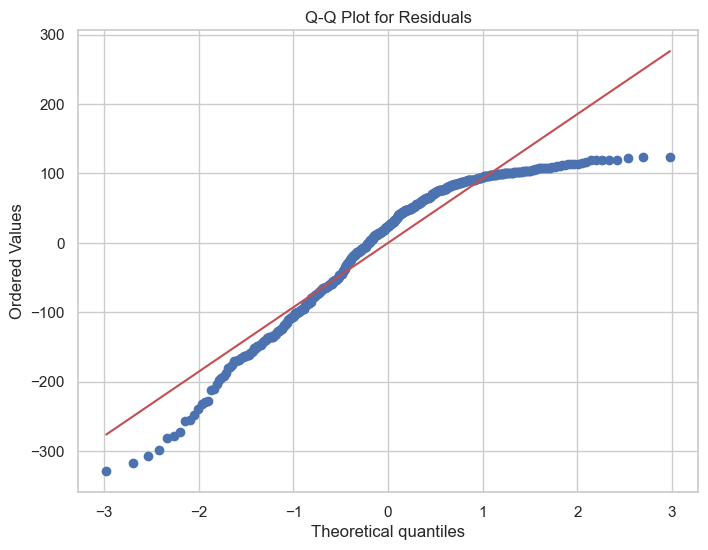

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(model_final.resid, dist="norm", plot=ax)
ax.set_title('Q-Q Plot for Residuals')
plt.show()

The QQ plot's deviation from the red line, representing normal distribution, indicates departures from normality in the residuals. Specifically, observations showcase a clear pattern: at lower x-values, the scatter points fall below the red line, suggesting heavier tails or more extreme values than expected under a normal distribution. In the middle range of x-values, the points veer above the line, indicating a relatively heavier concentration of residuals around the mean. Beyond these values, the scatter points once again fall below the line, signifying further heavy-tailedness or potential outliers. This distinct pattern in the QQ highlights the presence of non-normality in the residuals. 

### Evaluate the robustness of your estimates by bootstrapping your model. Provide a histogram of the bootstrapped estimates, and comment on the findings.

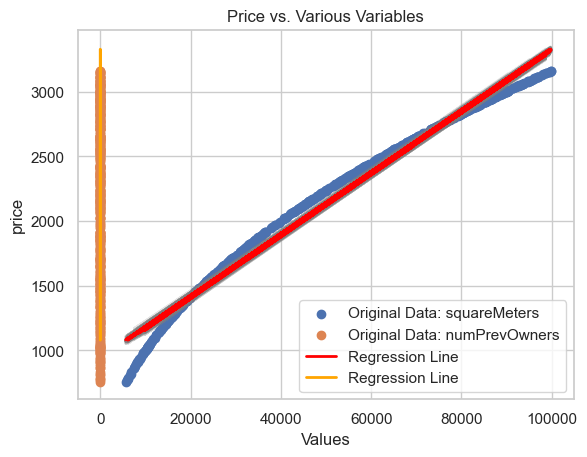

In [26]:
# Fit the initial OLS model
ols_mod = smf.ols('price ~ squareMeters + numPrevOwners + I(numPrevOwners**2)', data_c).fit()

# Initialize lists for bootstrapped coefficients and adjusted R-squared
boot_slope1 = []
boot_slope2 = []
boot_slope3 = []
boot_interc = []
boot_adjR2 = []

n_boots = 100
n_points = data_c.shape[0]

plt.figure()

# Perform bootstrapping
for _ in range(n_boots):
    sample_df = data_c.sample(n=n_points, replace=True)

    ols_model_temp = smf.ols('price ~ squareMeters + numPrevOwners + I(numPrevOwners**2)', sample_df)
    results_temp = ols_model_temp.fit()

    boot_interc.append(results_temp.params[0])
    boot_slope1.append(results_temp.params[1])
    boot_slope2.append(results_temp.params[2])
    boot_slope3.append(results_temp.params[3])
    boot_adjR2.append(results_temp.rsquared_adj)

    y_pred_temp = results_temp.predict(sm.add_constant(sample_df[['squareMeters', 'numPrevOwners']]))
    plt.plot(sample_df['squareMeters'], y_pred_temp, color='grey', alpha=0.2)

# Predict using the original model for plotting
y_pred = ols_mod.predict(sm.add_constant(data_c[['squareMeters', 'numPrevOwners']]))

# Use individual columns as x-values
plt.scatter(data_c['squareMeters'], data_c['price'], label='Original Data: squareMeters')
plt.scatter(data_c['numPrevOwners'], data_c['price'], label='Original Data: numPrevOwners')

plt.plot(data_c['squareMeters'], y_pred, linewidth=2, color='red', label='Regression Line')
plt.plot(data_c['numPrevOwners'], y_pred, linewidth=2, color='orange', label='Regression Line')

plt.grid(True)
plt.xlabel('Values')
plt.ylabel('price')
plt.title('Price vs. Various Variables')
plt.legend()
plt.show()

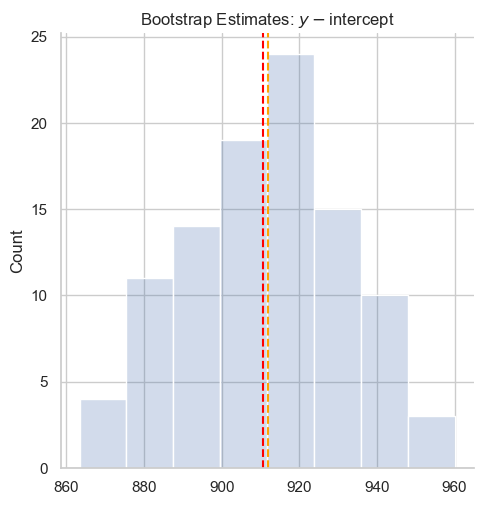

In [27]:
sns.displot(boot_interc, alpha = 0.25)
plt.axvline(x=model_final.params[0], color='red', linestyle='--')
plt.axvline(x=np.mean(boot_interc), color='orange', linestyle='--')
plt.title('Bootstrap Estimates: $y-$intercept')
plt.show()


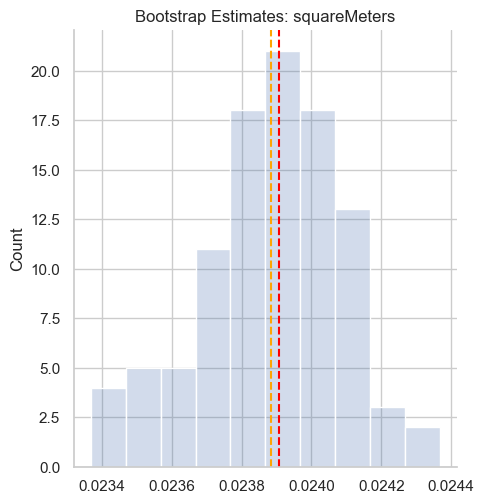

In [28]:
sns.displot(boot_slope1, alpha = 0.25)
plt.axvline(x=model_final.params[1],color='red', linestyle='--')
plt.axvline(x=np.mean(boot_slope1),color='orange', linestyle='--')
plt.title('Bootstrap Estimates: squareMeters')
plt.show()

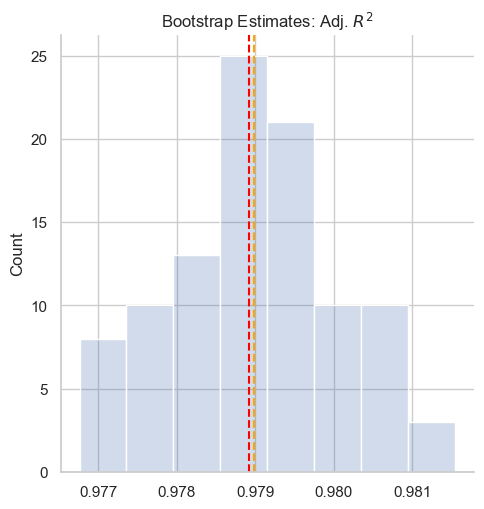

In [29]:
sns.displot(boot_adjR2, alpha = 0.25)
plt.axvline(x=model_final.rsquared,color='red', linestyle='--')
plt.axvline(x=np.mean(boot_adjR2),color='orange', linestyle='--')
plt.title('Bootstrap Estimates: Adj. $R^2$')
plt.show()


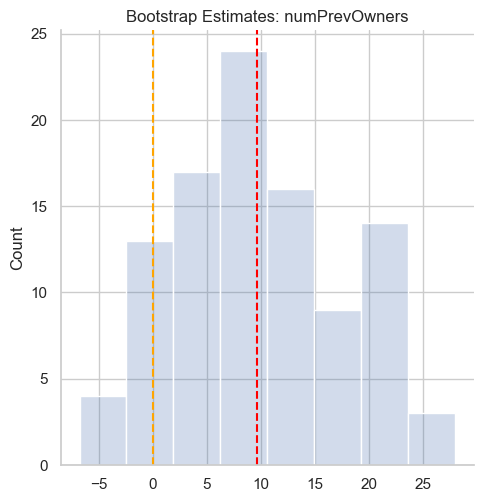

In [30]:
sns.displot(boot_slope2, alpha = 0.25)
plt.axvline(x=model_final.params[2],color='red', linestyle='--')
plt.axvline(x=np.mean(boot_slope1),color='orange', linestyle='--')
plt.title('Bootstrap Estimates: numPrevOwners')
plt.show()


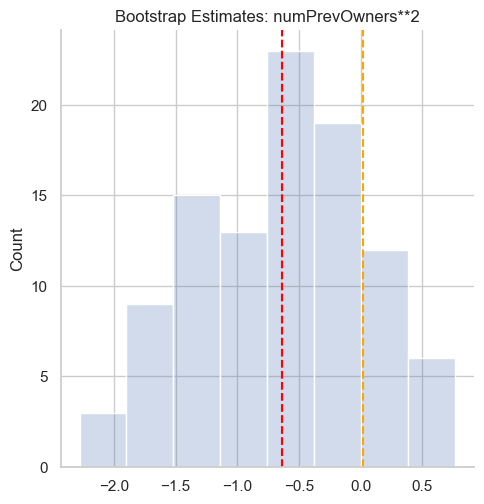

In [31]:
sns.displot(boot_slope3, alpha = 0.25)
plt.axvline(x=model_final.params[3],color='red', linestyle='--')
plt.axvline(x=np.mean(boot_slope1),color='orange', linestyle='--')
plt.title('Bootstrap Estimates: numPrevOwners**2')
plt.show()


The proximity of the model parameters to the mean values within the bootstrap histogram suggests stability and consistency in the estimated coefficients. This alignment implies that the original model's parameter estimates are not heavily influenced by specific outliers or extreme observations within the dataset. The closeness between the model parameters and the mean of the bootstrapped estimates reinforces confidence in the reliability of the model's coefficients, indicating consistency in their estimated values across multiple samples drawn from the dataset. However, we observe that this promixity deviates slightly for the coefficients for the variable 'numPrevOwners', indicating that they might not be robust. 

**Overall, this alignment supports the robustness and stability of the estimated model parameters.**

### Use cross-validation to evaluate your model’s performance.

In [78]:

data_c['numPrevOwners_sq'] = data_c['numPrevOwners'] ** 2

x = data_c[['squareMeters', 'numPrevOwners','numPrevOwners_sq']]
y = data_c['price']

regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


regr = LinearRegression()
regr.fit(x_train, y_train)


y_pred = regr.predict(x_test)



print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

MAE: 78.71288547787998
MSE: 9888.737906692633
RMSE: 99.44213345807015
5-Fold CV RMSE Scores: [-98.69882819 -99.41976781 -94.45723337 -97.17557206 -95.47190214]


MAE, MSE and RMSE values of our model tell us 


and so lower values for MAE, MSE, and RMSE indicate better model performance. Looking at these scores for our model:


- **Mean Absolute Error:** MAE is approximately 1.44. 

It indicates that, on average, the model's predictions deviate by around 109.07 units from the actual values, indicating overfitting in the model.
- Mean Squared Error (MSE):
    - The MSE is a measure of the average squared differences between predicted and actual values.
    - The MSE is approximately 19283.6, which provides a measure of the average magnitude of the squared errors.
- Root Mean Squared Error (RMSE):
    - The RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors.
    - The RMSE is approximately 138.8
    
    
Cross-validation helps assess how well the model generalizes to new data by providing multiple evaluations on different subsets of the dataset 

- 5-Fold Cross-Validation RMSE Scores:
    - Cross-validation is performed to assess the model's performance on different subsets of the data.
    - The 5-fold cross-validation RMSE scores are [-160.76315972 -144.931996   -141.56283466 -125.07685096                 -141.70361693].
    - Overall, the model seems to have some errors based on the scores. This proves our hypothesis that the model is overfitted.

### Make sure to also discuss any relevant marginal effects estimated.

In [79]:
model_final.params

Intercept                910.657032
squareMeters               0.023906
numPrevOwners              9.657354
I(numPrevOwners ** 2)     -0.633358
dtype: float64

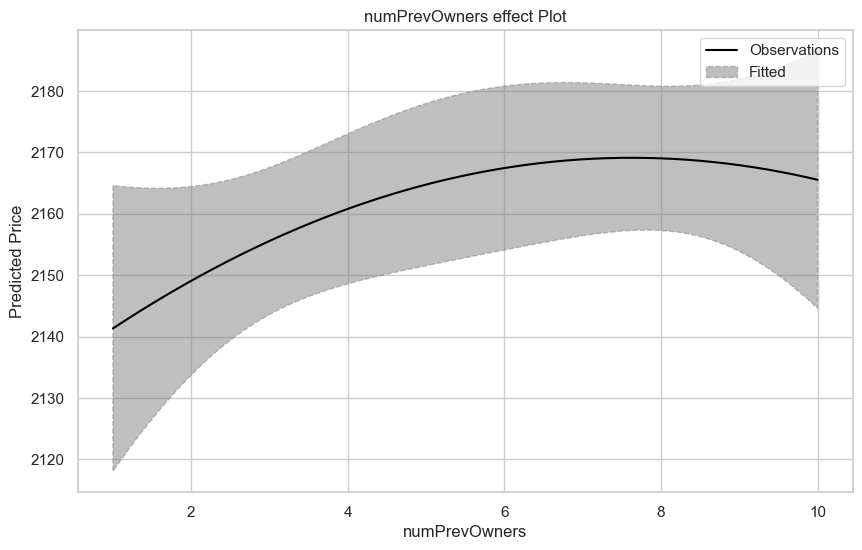

In [32]:
new_data = data_c[['numPrevOwners']].copy()

# Generate predictions over range
new_data = pd.DataFrame({'numPrevOwners': np.linspace(data_c['numPrevOwners'].min(), data_c['numPrevOwners'].max(), 2000),
                         'squareMeters': data_c['squareMeters'].mean()})

predictions = model_final.get_prediction(new_data)

# Generate table with intervals for each x
predictions = predictions.summary_frame(alpha=0.05)

plt.figure(figsize = (10, 6))

plt.plot(new_data['numPrevOwners'], predictions["mean"], color = "black")

plt.title('numPrevOwners effect Plot')
plt.xlabel("numPrevOwners")
plt.ylabel("Predicted Price")

# confidence Intervals
plt.fill_between(new_data['numPrevOwners'], predictions["mean_ci_lower"], predictions["mean_ci_upper"],
                 color = "grey", linestyle = '--', alpha = .5)

plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

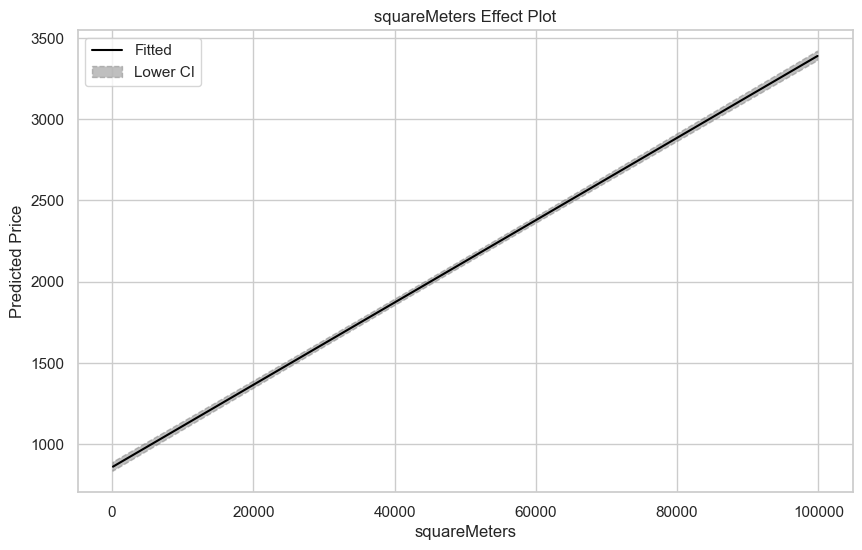

In [36]:
# Generate new_data for predictions
new_data = pd.DataFrame({'squareMeters': np.linspace(data['squareMeters'].min(), data['squareMeters'].max(), 2000),
                         'numPrevOwners': data['numPrevOwners'].mean()})

# Generate predictions over the range
predictions = model_final.get_prediction(new_data)

# Generate table with intervals for each x
predictions_summary = predictions.summary_frame(alpha=0.05)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the mean predictions
plt.plot(new_data['squareMeters'], predictions_summary["mean"], color="black", label="Fitted")

# Confidence Intervals
plt.fill_between(new_data['squareMeters'], predictions_summary["mean_ci_lower"], predictions_summary["mean_ci_upper"],
                 color="grey", linestyle='--', alpha=.5)

plt.legend(["Fitted", "Lower CI", "Upper CI"])

plt.title('squareMeters Effect Plot')
plt.xlabel("squareMeters")
plt.ylabel("Predicted Price")

plt.show()

The effects plot showcasing the relationship between the number of previous owners (numPrevOwners) and the transformed housing price (price) reveals an intriguing pattern. Initially, as the number of previous owners increases, the slope rises; however, it does so at a decreasing rate.

This observed pattern of a decreasing incremental effect suggests a potential nonlinear relationship between these variables. It indicates that the influence of numPrevOwners on price is subject to diminishing returns or a curve, signifying that additional previous owners may have a lesser impact on the transformed price as the number increases.

On the other hand, squareMeters has a linear positive relationship with 'price', as seen from the marginal effects plot.

### If you identify any model issues (e.g., multicollinearity, etc.) make sure to resolve them before finalizing your proposed model.

In [48]:
# estimate model:
#mr_mod = smf.ols(formula='colGPA ~ hsGPA + ACT + alcohol', data=df)
#results_ols= mr_mod.fit()

# FGLS (estimation of the variance function):
data_c['logu2'] = np.log(model_final.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ np.log(squareMeters) + np.log(numPrevOwners) + np.log(I(numPrevOwners**2))', data=data_c)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 4),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})


# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='price ~ squareMeters + numPrevOwners + I(numPrevOwners**2)',
                  weights=wls_weight, data=data_c)
results_wls = reg_wls.fit()

In [41]:
results_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.980
Model:                            WLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     7561.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:20:27   Log-Likelihood:                -2838.4
No. Observations:                 477   AIC:                             5685.
Df Residuals:                     473   BIC:                             5702.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               932.3084     19.072     48.884      0.000     894.833     969.784
squareMeters              0.0236      0.000    150.204      0.000       0.023       0.024
numPrevOwners             9.2141      6.863      1.343      0.180      -4.271      22.699
I(numPrevOwners ** 2)    -0.5852      0.602     -0.972      0.332      -1.769       0.598
==============================================================================
Omnibus:                       45.101   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.574
Skew:                          -0.843   Prob(JB):                     5.19e-13
Kurtosis:                       2.960   Cond. No.                     2.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We observed a higher R-squared value along with lower AIC and BIC values, and higher t-statistics. Based on these improvements, we can conclude that the predictive power of our mdoel has increased slightly.

### Once you have finalized your model, please provide an interpretation of your model parameters, and any economic insights you learned from it (this includes answering the questions you proposed in the introduction).

The model we used to predict house prices in Paris considers three factors: the size of the house (square meters), the number of previous owners (numPrevOwners), and the squared term of the number of previous owners (I(numPrevOwners ** 2)). The following are our observations:

**Intercept:**  While the intercept does not hold practical significance, the estimated base price for a house with no square meters and no previous owners is 932.3084.

**squareMeters:** Each additional square meter in the house is linked to a predicted increase in price of 0.0236 units.

**numPrevOwners:** On average, each extra previous owner is associated with a higher house price by 9.2141 units. However, the p-value of 0.180 makes this relationship uncertain.

**I(numPrevOwners ** 2):** The squared term of the number of previous owners aims to capture a potential non-linear relationship between the number of previous owners and house prices. The squared term suggests a diminishing return effect, that as the number of previous owners increases, the impact on house prices becomes less pronounced or diminishes. But this impact is also not statistically significant (p-value: 0.332).

In conclusion, our model suggests that bigger houses tend to have higher prices which aligns with basic economic intuition that larger houses generally are valued at higher prices due to the increased living space they offer. However, when it comes to the number of previous owners, the situation becomes more nuanced. Our data hints that having more previous owners might influence house prices, but this relationship might not be statistically significant. Looking at the squared term of the number of previous owners,  the negative coefficient of -0.5852  in housing markets could mean that while having some previous owners may positively influence a house's perceived value, the additional benefit diminishes as the number of previous owners rises.

**Recommendations:**

To really understand what's driving house prices in Paris, we might need to dig deeper, maybe considering other factors not included in our current model. Economic theories help guide our thinking, but the housing market is complex, and there's always more to explore.

To make our model stronger and more accurate, we suggest getting a bigger dataset that includes more information about houses. This extra information could be things like details about the neighborhood, economic trends, or other factors that might affect house prices.

By expanding the dataset this way, we hope to get a fuller picture of what influences house prices in Paris. We believe that having a more detailed dataset will help us build a better model.

It's important to note that finding the right factors that impact house prices is an ongoing process. So, adding more information to our dataset is just one step. We're also open to learning from experts in real estate or economics to make sure our model reflects the real world as accurately as possible.